<a href="https://colab.research.google.com/github/mariacharisi/Earth-Term-MMA/blob/main/ETerm_Paper_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Efficient large-scale, targeted gravitational-wave probes of supermassive black-hole binaries

### Maria Charisi, Stephen R. Taylor, Caitlin A. Witt, Jessie Runnoe

Supermassive black hole binaries are promising sources of low-frequency gravitational waves (GWs) and bright electromagnetic emission. Pulsar timing array searches for resolved binaries are complex and computationally expensive and so far limited to only a few sources. We present an efficient approximation that empowers large-scale targeted multi-messenger searches by neglecting GW signal components from the pulsar term. This Earth-term approximation provides similar constraints on the total mass and GW frequency of the binary, yet is $>100$ times more efficient. 

This notebook provides a detailed comparison of the parameter estimation and computational efficiency of Bayesian analyses that model the full signal likelihood (PTerm) versus ones that neglect the pulsar terms (ETerm) for targeted pulsar timing array searches. Targeted searches (for which the galaxy is fixed in the search) are important: (1) to follow-up candidates identified in electromagnetic surveys, e.g., quasars with periodic variability, and (2) to follow-up promising host galaxies in the error volume of the first GW detected binary.

This notebook contains comparisons of the *ETerm* and *PTerm* analyses in terms of:

1.   Input versus output (the posterior median and percentiles).
2.   Distributions of the percent error $\delta_X [\%]$ of the posterior median with respect to the input value.
3.   The fraction of realizations for which the posterior median is within posterior median 10% of the injected value.
4.   The 68% confidence intervals and the ratios between the two analyses.
5.   The distributions of KL divergence (quantifying the difference between posterior and prior) and the ratios between the two analyses.
6.   The p-p test.
7.   The autocorrelation lengths of the MCMC chains and the ratio between two analysis.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Binary Parameters

We inject one SMBHB signal in each simulated PTA dataset, randomly drawing the binary parameters from uniform distributions in the following ranges: 

*   **Sky location** $\theta: [0, \pi]$, and $\phi: [0, 2\pi]$
*   **Distance** $\log_{10} (D/\mathrm{Mpc}): [1,3]$
*   **Total binary mass** $\log_{10} (M_{\rm tot}/M_\odot):[9,10]$
*   **Binary mass ratio** $\log_{10}q: [-1,0]$; 
*   **GW frequency**  $\log_{10} (f/\mathrm{Hz}):[-9,-7.5]$
*   **Orbital inclination angle** $\cos\iota:[-1,1]$
*   **Initial Earth-term phase** $\Phi_0: [0,2\pi]$
*   **GW polarization angle**  $\psi: [0,\pi]$.

We present the results of 824 simulations with SNR between 5 and 100 (see GW Signals and Simulations in the paper).




In [ ]:
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
data = np.load('/content/drive/My Drive/Paper_data.npz')

log10_M=data['log10_M']
log10_q=data['log10_q']
log10_fgw=data['log10_fgw']
phase=data['phase']
cosi=data['cosi']
psi=data['psi']
#these are fixed in targeted searches
logD=data['log10_D']
distance=10**logD
phi=data['phi']
theta=data['theta']

snr=data['snr']

N_binaries=np.shape(log10_fgw)[0]


Mounted at /content/drive


## Posterior Percentiles

In [ ]:
#ETerm
ETerm_cosi_50 = data['ETerm_cosi_50']
ETerm_cosi_16 = data['ETerm_cosi_16']
ETerm_cosi_84 = data['ETerm_cosi_84']

ETerm_logM_50 = data['ETerm_logM_50']
ETerm_logM_16 = data['ETerm_logM_16']
ETerm_logM_84 = data['ETerm_logM_84']

ETerm_logf_50 = data['ETerm_logf_50']
ETerm_logf_16 = data['ETerm_logf_16']
ETerm_logf_84 = data['ETerm_logf_84']

ETerm_logq_50 = data['ETerm_logq_50']
ETerm_logq_16 = data['ETerm_logq_16']
ETerm_logq_84 = data['ETerm_logq_84']

ETerm_phase_50 = data['ETerm_phase_50']
ETerm_phase_16 = data['ETerm_phase_16']
ETerm_phase_84 = data['ETerm_phase_84']

ETerm_psi_50 = data['ETerm_psi_50']
ETerm_psi_16 = data['ETerm_psi_16']
ETerm_psi_84 = data['ETerm_psi_84']

#PTerm
PTerm_cosi_50 = data['PTerm_cosi_50']
PTerm_cosi_16 = data['PTerm_cosi_16']
PTerm_cosi_84 = data['PTerm_cosi_84']

PTerm_logM_50 = data['PTerm_logM_50']
PTerm_logM_16 = data['PTerm_logM_16']
PTerm_logM_84 = data['PTerm_logM_84']

PTerm_logf_50 = data['PTerm_logf_50']
PTerm_logf_16 = data['PTerm_logf_16']
PTerm_logf_84 = data['PTerm_logf_84']

PTerm_logq_50 = data['PTerm_logq_50']
PTerm_logq_16 = data['PTerm_logq_16']
PTerm_logq_84 = data['PTerm_logq_84']

PTerm_phase_50 = data['PTerm_phase_50']
PTerm_phase_16 = data['PTerm_phase_16']
PTerm_phase_84 = data['PTerm_phase_84']

PTerm_psi_50 = data['PTerm_psi_50']
PTerm_psi_16 = data['PTerm_psi_16']
PTerm_psi_84 = data['PTerm_psi_84']



## Input versus Output Comparison

In the following plots we show the injected values versus the posterior median of the two Bayesian analyses (along with error bars representing the 16th and 84th percentiles) for each binary parameter and for all binary realizations, color-coded by the SNR.

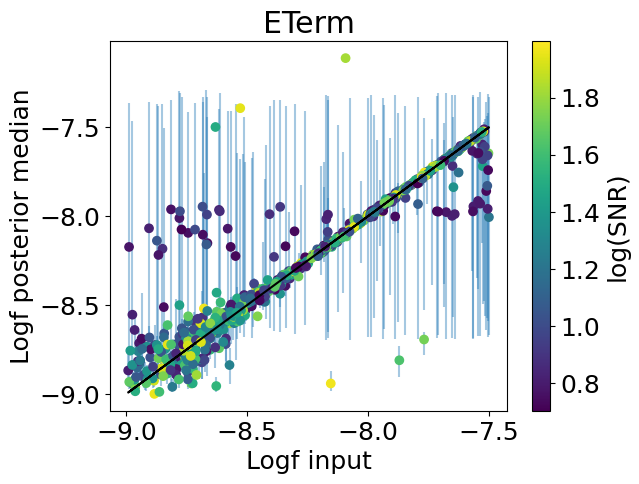

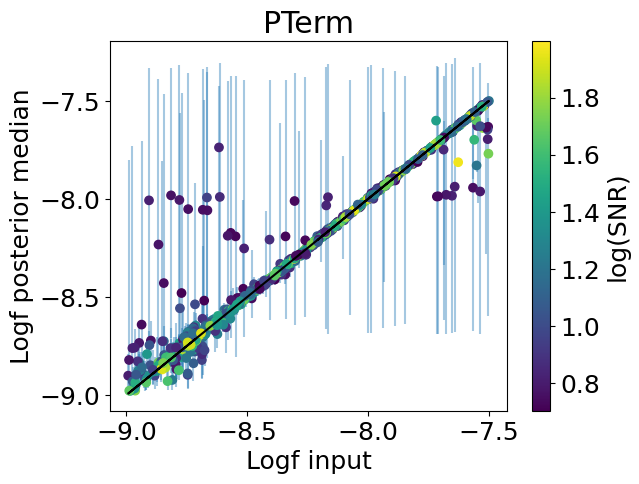

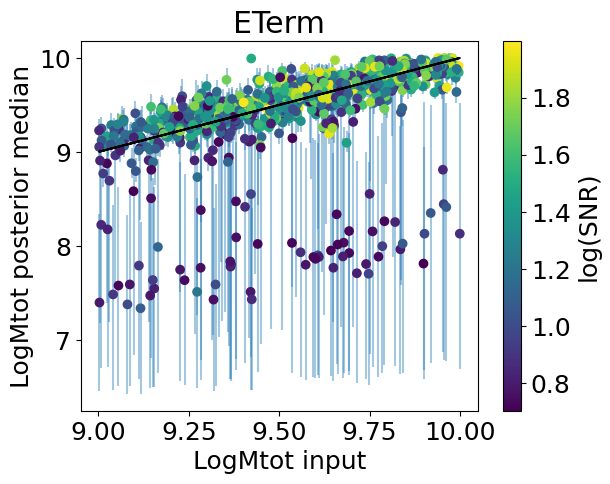

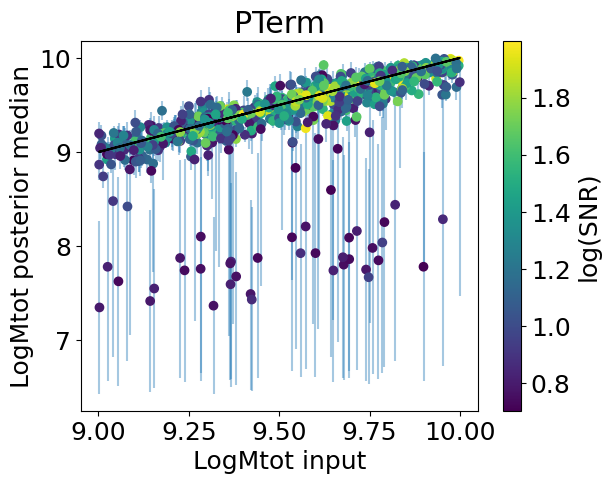

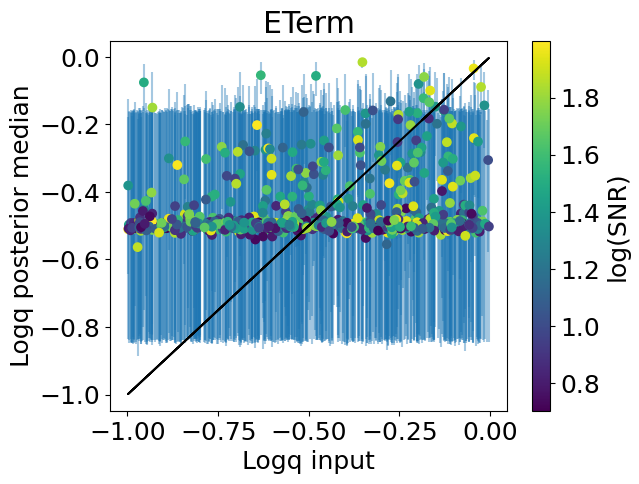

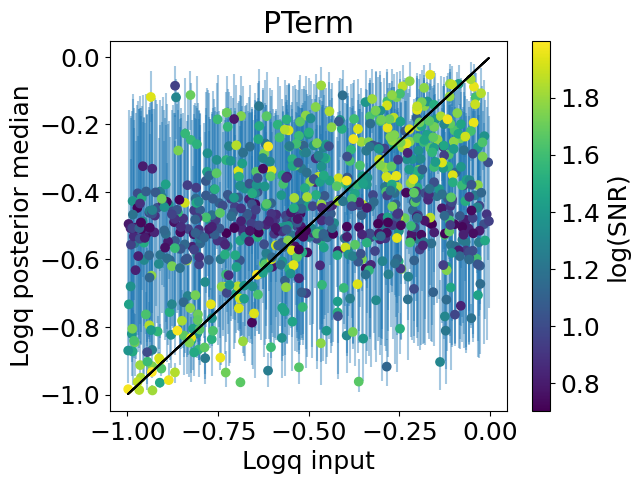

In [ ]:
plt.rcParams.update({'font.size': 18})

#Logf
#Earth Term Analysis
ytopE = ETerm_logf_84-ETerm_logf_50
ybotE = ETerm_logf_50-ETerm_logf_16


plt.plot(log10_fgw,log10_fgw,c='k',zorder=3)
plt.errorbar(log10_fgw, ETerm_logf_50, yerr=(ybotE, ytopE),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(log10_fgw, ETerm_logf_50,c=np.log10(snr),zorder=2)
cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')

plt.xlabel('Logf input')
plt.ylabel('Logf posterior median')
plt.title('ETerm')
plt.show()


#Pulsar Term Analysis
ytopP = PTerm_logf_84-PTerm_logf_50
ybotP = PTerm_logf_50-PTerm_logf_16


plt.plot(log10_fgw,log10_fgw,c='k',zorder=3)
plt.errorbar(log10_fgw, PTerm_logf_50, yerr=(ybotP, ytopP),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(log10_fgw, PTerm_logf_50,c=np.log10(snr),zorder=2)



cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')

plt.xlabel('Logf input')
plt.ylabel('Logf posterior median')
plt.title('PTerm')

plt.show()


###################################
#LogMtot
#Earth Term Analysis
ytopE = ETerm_logM_84-ETerm_logM_50
ybotE = ETerm_logM_50-ETerm_logM_16


plt.plot(log10_M,log10_M,c='k',zorder=3)
plt.errorbar(log10_M, ETerm_logM_50, yerr=(ybotE, ytopE),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(log10_M, ETerm_logM_50,c=np.log10(snr),zorder=2)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')

plt.xlabel('LogMtot input')
plt.ylabel('LogMtot posterior median')
plt.title('ETerm')


plt.show()

#Pulsar Term Analysis
ytopP = PTerm_logM_84-PTerm_logM_50
ybotP = PTerm_logM_50-PTerm_logM_16


plt.plot(log10_M,log10_M,c='k',zorder=3)
plt.errorbar(log10_M, PTerm_logM_50, yerr=(ybotP, ytopP),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(log10_M, PTerm_logM_50,c=np.log10(snr),zorder=2)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')


plt.xlabel('LogMtot input')
plt.ylabel('LogMtot posterior median')
plt.title('PTerm')

plt.show()


###################################
#Logq
#Earth Term Analysis
ytopE = ETerm_logq_84-ETerm_logq_50
ybotE = ETerm_logq_50-ETerm_logq_16


plt.plot(log10_q,log10_q,c='k',zorder=3)
plt.errorbar(log10_q, ETerm_logq_50, yerr=(ybotE, ytopE),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(log10_q, ETerm_logq_50,c=np.log10(snr),zorder=2)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')

plt.xlabel('Logq input')
plt.ylabel('Logq posterior median')
plt.title('ETerm')

plt.show()

#Pulsar Term Analysis
ytopP = PTerm_logq_84-PTerm_logq_50
ybotP = PTerm_logq_50-PTerm_logq_16


plt.plot(log10_q,log10_q,c='k',zorder=3)
plt.errorbar(log10_q, PTerm_logq_50, yerr=(ybotP, ytopP),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(log10_q, PTerm_logq_50,c=np.log10(snr),zorder=2)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')

plt.xlabel('Logq input')
plt.ylabel('Logq posterior median')
plt.title('PTerm')

plt.show()




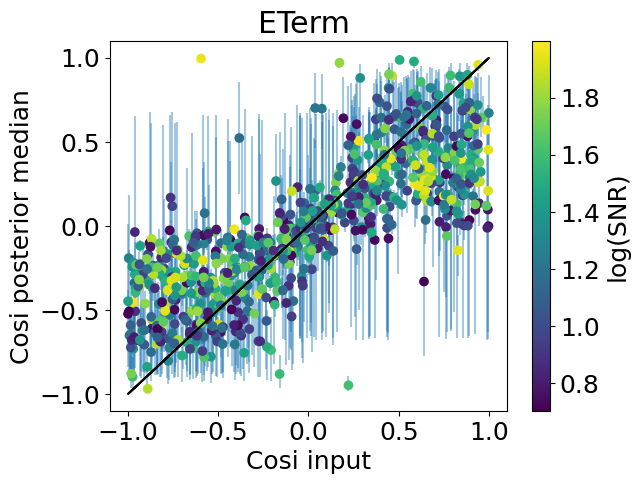

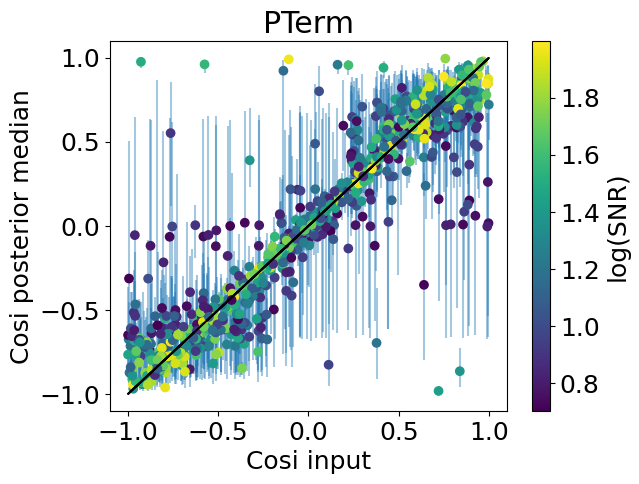

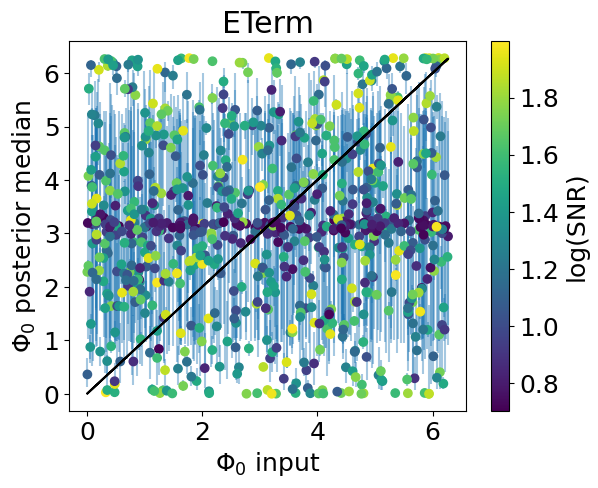

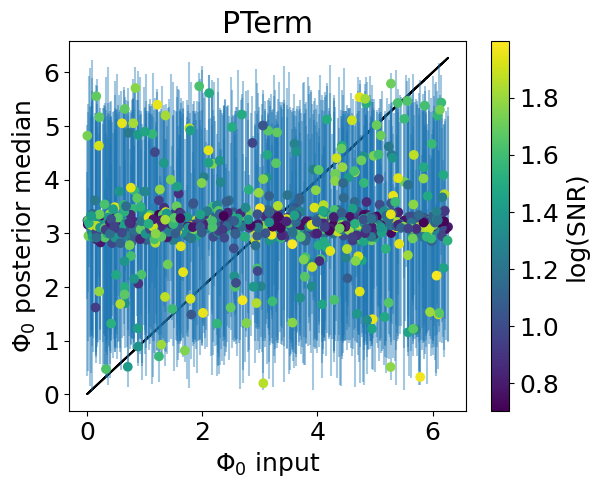

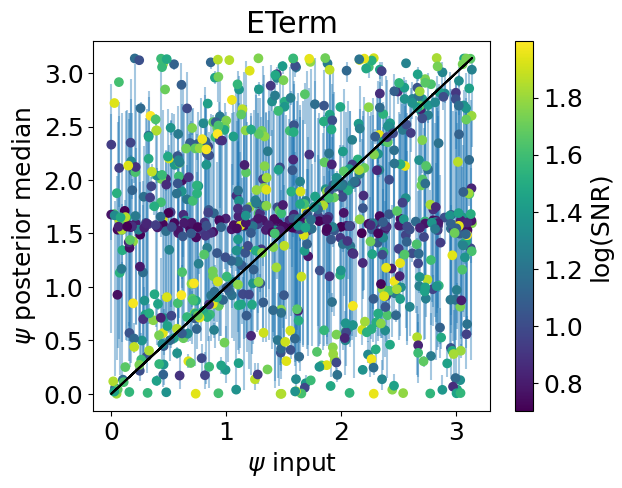

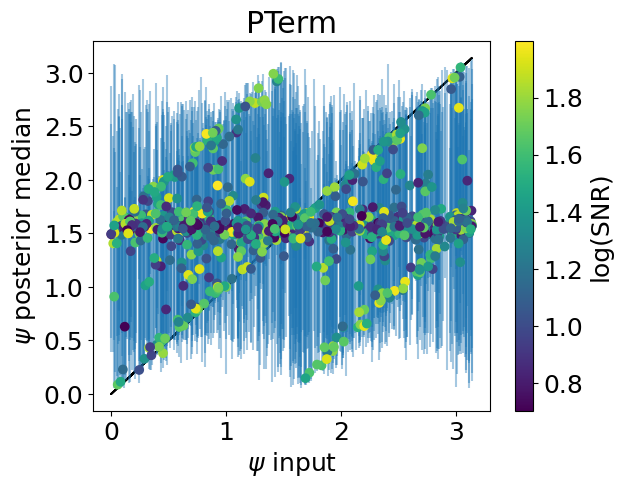

In [ ]:
#Cosi
#Earth Term Analysis
ytopE = ETerm_cosi_84-ETerm_cosi_50
ybotE = ETerm_cosi_50-ETerm_cosi_16


plt.plot(cosi,cosi,c='k',zorder=3)
plt.errorbar(cosi, ETerm_cosi_50, yerr=(ybotE, ytopE),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(cosi, ETerm_cosi_50,c=np.log10(snr),zorder=2)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')

plt.xlabel('Cosi input')
plt.ylabel('Cosi posterior median')
plt.title('ETerm ')

plt.show()

#Pulsar Term Analysis
ytopP = PTerm_cosi_84-PTerm_cosi_50
ybotP = PTerm_cosi_50-PTerm_cosi_16


plt.plot(cosi,cosi,c='k',zorder=3)
plt.errorbar(cosi, PTerm_cosi_50, yerr=(ybotP, ytopP),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(cosi, PTerm_cosi_50,c=np.log10(snr),zorder=2)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')


plt.xlabel('Cosi input')
plt.ylabel('Cosi posterior median')
plt.title('PTerm')

plt.show()

###################################
#Initial GW phase
#Earth Term Analysis
ytopE = ETerm_phase_84-ETerm_phase_50
ybotE = ETerm_phase_50-ETerm_phase_16

plt.plot(phase,phase,c='k',zorder=3)
plt.errorbar(phase, ETerm_phase_50, yerr=(ybotE, ytopE),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(phase, ETerm_phase_50,c=np.log10(snr),zorder=1)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')


plt.xlabel(r'$\Phi_0$ input')
plt.ylabel(r'$\Phi_0$ posterior median')
plt.title('ETerm')

plt.show()

#Pulsar Term Analysis
ytopP = PTerm_phase_84-PTerm_phase_50
ybotP = PTerm_phase_50-PTerm_phase_16


plt.plot(phase,phase,c='k',zorder=1)
plt.errorbar(phase, PTerm_phase_50, yerr=(ybotP, ytopP),alpha=0.4,fmt='none',zorder=2)
sc=plt.scatter(phase, PTerm_phase_50,c=np.log10(snr),zorder=3)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')

plt.xlabel(r'$\Phi_0$ input')
plt.ylabel(r'$\Phi_0$ posterior median')
plt.title('PTerm')

plt.show()

###################################
#GW polarization angle
#Earth Term Analysis
ytopE = ETerm_psi_84-ETerm_psi_50
ybotE = ETerm_psi_50-ETerm_psi_16


plt.plot(psi,psi,c='k',zorder=3)
plt.errorbar(psi, ETerm_psi_50, yerr=(ybotE, ytopE),alpha=0.4,fmt='none',zorder=1)
sc=plt.scatter(psi, ETerm_psi_50,c=np.log10(snr),zorder=2)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')


plt.xlabel(r'$\psi$ input')
plt.ylabel('$\psi$ posterior median')
plt.title('ETerm')


plt.show()

#Pulsar Term Analysis
ytopP = PTerm_psi_84-PTerm_psi_50
ybotP = PTerm_psi_50-PTerm_psi_16


plt.plot(psi,psi,c='k',zorder=1)
plt.errorbar(psi, PTerm_psi_50, yerr=(ybotP, ytopP),alpha=0.4,fmt='none',zorder=2)
sc=plt.scatter(psi, PTerm_psi_50,c=np.log10(snr),zorder=3)

cbar=plt.colorbar(sc)
cbar.set_label('log(SNR)')


plt.xlabel(r'$\psi$ input')
plt.ylabel('$\psi$ posterior median')
plt.title('PTerm')

plt.show()

## Percent Error

### $\delta_X=(X_{input} - X_{post., 50})/X_{input}\times100\%$

We examine how well the injected values, $X_{\rm in}$, are recovered across all our simulated datasets, by calculating the percentage errors of the posterior median $\delta_X$. Below we compare the distribution of the percentage error for each binary parameter between the *ETerm* and *PTerm* analyses. We also show the percentiles of these distributions. See also Results, Figure 2 and Table 1 in the paper.

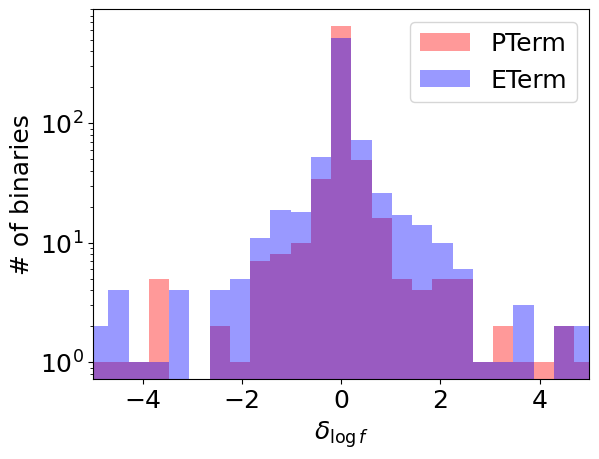

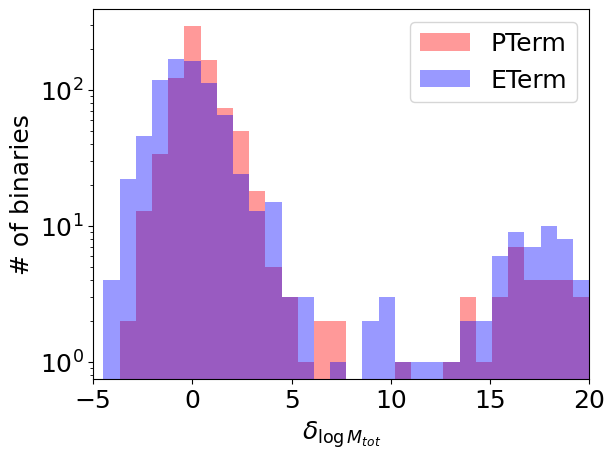

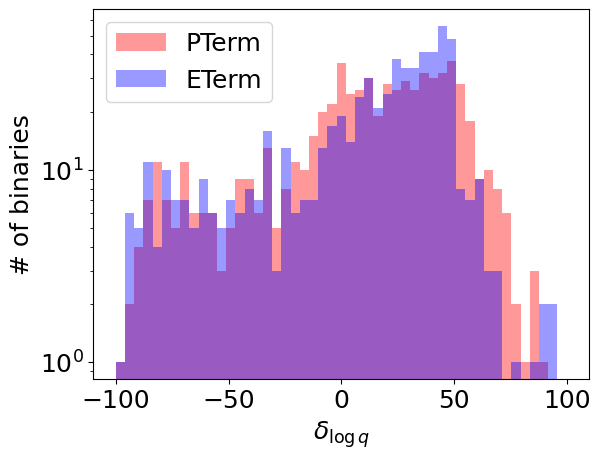

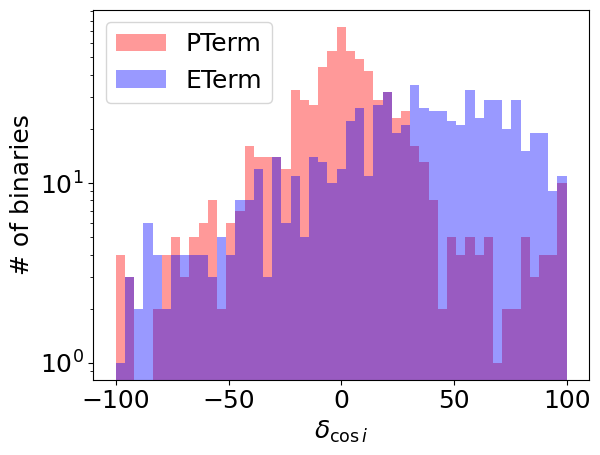

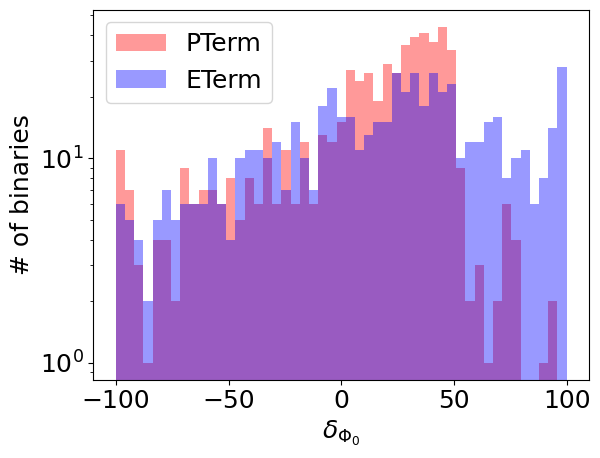

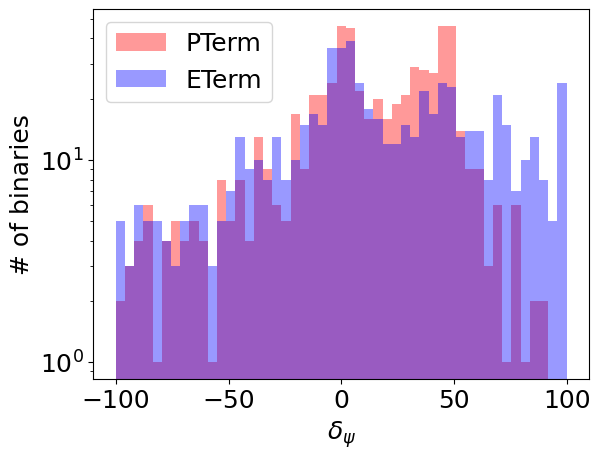

In [ ]:
#Logf
ff_vector=np.linspace(-10,10,50)
ETerm_delta_logf=(log10_fgw-ETerm_logf_50)*100/log10_fgw
PTerm_delta_logf=(log10_fgw-PTerm_logf_50)*100/log10_fgw

plt.hist(PTerm_delta_logf,ff_vector,color='r',alpha=0.4)
plt.hist(ETerm_delta_logf,ff_vector,color='b',alpha=0.4)
plt.yscale('log')
plt.xlim([-5,5])
plt.legend(['PTerm','ETerm'],fontsize=18)
plt.ylabel('# of binaries', fontsize=18)
plt.xlabel(r'$\delta_{\log f}$',fontsize=18)

plt.show()

###################################################
#LogMtot
MM_vector=np.linspace(-20,20,50)
ETerm_delta_logM=(log10_M-ETerm_logM_50)*100/log10_M
PTerm_delta_logM=(log10_M-PTerm_logM_50)*100/log10_M

plt.hist(PTerm_delta_logM,MM_vector,color='r',alpha=0.4)
plt.hist(ETerm_delta_logM,MM_vector,color='b',alpha=0.4)
plt.xlim([-5,20])

plt.legend(['PTerm','ETerm'],fontsize=18)
plt.ylabel('# of binaries', fontsize=18)
plt.yscale('log')
plt.xlabel(r'$\delta_{\log M_{tot}}$',fontsize=18)

plt.show()

###################################################
#Logq
qq_vector=np.linspace(-100,100,50)
ETerm_delta_logq=(log10_q-ETerm_logq_50)*100/log10_q
PTerm_delta_logq=(log10_q-PTerm_logq_50)*100/log10_q

plt.hist(PTerm_delta_logq,qq_vector,color='r',alpha=0.4)
plt.hist(ETerm_delta_logq,qq_vector,color='b',alpha=0.4)

plt.legend(['PTerm','ETerm'],fontsize=18)
plt.ylabel('# of binaries', fontsize=18)
plt.yscale('log')
plt.xlabel(r'$\delta_{\log q}$',fontsize=18)

plt.show()

###################################################
#Cosi
cosi_vector=np.linspace(-100,100,50)
ETerm_delta_cosi=(cosi-ETerm_cosi_50)*100/cosi
PTerm_delta_cosi=(cosi-PTerm_cosi_50)*100/cosi

plt.hist(PTerm_delta_cosi,cosi_vector,color='r',alpha=0.4)
plt.hist(ETerm_delta_cosi,cosi_vector,color='b',alpha=0.4)

plt.legend(['PTerm','ETerm'],fontsize=18)
plt.ylabel('# of binaries', fontsize=18)
plt.yscale('log')
plt.xlabel(r'$\delta_{\cos i}$',fontsize=18)
plt.show()

###################################################
#Initial GW phase
phase_vector=np.linspace(-100,100,50)
ETerm_delta_phase=(phase-ETerm_phase_50)*100/phase
PTerm_delta_phase=(phase-PTerm_phase_50)*100/phase

plt.hist(PTerm_delta_phase,phase_vector,color='r',alpha=0.4)
plt.hist(ETerm_delta_phase,phase_vector,color='b',alpha=0.4)

plt.legend(['PTerm','ETerm'],fontsize=18)
plt.ylabel('# of binaries', fontsize=18)
plt.yscale('log')
plt.xlabel(r'$\delta_{\Phi_0}$',fontsize=18)
plt.show()

###################################################
#GW Polarization angle
psi_vector=np.linspace(-100,100,50)
ETerm_delta_psi=(psi-ETerm_psi_50)*100/psi
PTerm_delta_psi=(psi-PTerm_psi_50)*100/psi

plt.hist(PTerm_delta_psi,psi_vector,color='r',alpha=0.4)
plt.hist(ETerm_delta_psi,psi_vector,color='b',alpha=0.4)
# plt.xlim([-20,20])

plt.legend(['PTerm','ETerm'],fontsize=18)
plt.ylabel('# of binaries', fontsize=18)
plt.yscale('log')
plt.xlabel(r'$\delta_{\psi}$',fontsize=18)

plt.show()

In [ ]:
#Logf
print('PTerm: delta_logf (16th, 50th and 84th percentiles):'
        ,np.percentile(PTerm_delta_logf,16),np.percentile(PTerm_delta_logf,50),np.percentile(PTerm_delta_logf,84))
print('ETerm: delta_logf (16th, 50th and 84th percentiles):'
        ,np.percentile(ETerm_delta_logf,16),np.percentile(ETerm_delta_logf,50),np.percentile(ETerm_delta_logf,84))

#LogMtot
print('PTerm: delta_logM (16th, 50th and 84th percentiles):'
        ,np.percentile(PTerm_delta_logM,16),np.percentile(PTerm_delta_logM,50),np.percentile(PTerm_delta_logM,84))
print('ETerm: delta_logM (16th, 50th and 84th percentiles):'
        ,np.percentile(ETerm_delta_logM,16),np.percentile(ETerm_delta_logM,50),np.percentile(ETerm_delta_logM,84))

#Logq
print('PTerm: delta_logq (16th, 50th and 84th percentiles):'
        ,np.percentile(PTerm_delta_logq,16),np.percentile(PTerm_delta_logq,50),np.percentile(PTerm_delta_logq,84))
print('ETerm: delta_logq (16th, 50th and 84th percentiles):'
        ,np.percentile(ETerm_delta_logq,16),np.percentile(ETerm_delta_logq,50),np.percentile(ETerm_delta_logq,84))

#Cosi
print('PTerm: delta_cosi (16th, 50th and 84th percentiles):'
        ,np.percentile(PTerm_delta_cosi,16),np.percentile(PTerm_delta_cosi,50),np.percentile(PTerm_delta_cosi,84))
print('ETerm: delta_cosi (16th, 50th and 84th percentiles):'
        ,np.percentile(ETerm_delta_cosi,16),np.percentile(ETerm_delta_cosi,50),np.percentile(ETerm_delta_cosi,84))

#Initial GW Phase
print('PTerm: delta_phase (16th, 50th and 84th percentiles):'
        ,np.percentile(PTerm_delta_phase,16),np.percentile(PTerm_delta_phase,50),np.percentile(PTerm_delta_phase,84))
print('ETerm: delta_phase (16th, 50th and 84th percentiles):'
        ,np.percentile(ETerm_delta_phase,16),np.percentile(ETerm_delta_phase,50),np.percentile(ETerm_delta_phase,84))

#GW polarization angle
print('PTerm: delta_psi (16th, 50th and 84th percentiles):'
        ,np.percentile(PTerm_delta_psi,16),np.percentile(PTerm_delta_psi,50),np.percentile(PTerm_delta_psi,84))
print('ETerm: delta_psi (16th, 50th and 84th percentiles):'
        ,np.percentile(ETerm_delta_psi,16),np.percentile(ETerm_delta_psi,50),np.percentile(ETerm_delta_psi,84))

PTerm: delta_logf (16th, 50th and 84th percentiles): -0.07837254765410276 0.004077143191102516 0.13160826476902385
ETerm: delta_logf (16th, 50th and 84th percentiles): -0.19519730884118475 0.0033955114768372766 0.38538018420472714
PTerm: delta_logM (16th, 50th and 84th percentiles): -0.6154518309211621 0.26588520857758546 1.7980839826219492
ETerm: delta_logM (16th, 50th and 84th percentiles): -1.5936685505245276 -0.18060192015990983 1.8799273026688976
PTerm: delta_logq (16th, 50th and 84th percentiles): -137.9185679011813 4.437989551115276 45.952385954040196
ETerm: delta_logq (16th, 50th and 84th percentiles): -173.16732836631402 8.90902134119282 43.60034629959744
PTerm: delta_cosi (16th, 50th and 84th percentiles): -34.14610436562884 0.6800928313766681 32.014155652435505
ETerm: delta_cosi (16th, 50th and 84th percentiles): -27.053569309557343 36.883877259707965 81.51361675393768
PTerm: delta_phase (16th, 50th and 84th percentiles): -243.47047115571468 1.9288567407914798 40.39395284356

## P10%



We also report the percentage of realizations, $P_{10\%}$, for which the posterior median is within 10\% of the injected value, i.e., $|\delta_X| < 10\%$. See Results and Table 1 in the paper.

In [ ]:
#Logf
PTerm_P10_logf=np.shape(np.where(np.abs(PTerm_delta_logf)<10))[1]/N_binaries*100
ETerm_P10_logf=np.shape(np.where(np.abs(ETerm_delta_logf)<10))[1]/N_binaries*100

print('PTerm: P10% logf:', PTerm_P10_logf) 
print('ETerm: P10% logf:', ETerm_P10_logf) 

#LogMtot
PTerm_P10_logM=np.shape(np.where(np.abs(PTerm_delta_logM)<10))[1]/N_binaries*100
ETerm_P10_logM=np.shape(np.where(np.abs(ETerm_delta_logM)<10))[1]/N_binaries*100

print('PTerm: P10% logMtot:', PTerm_P10_logM) 
print('ETerm: P10% logMtot:', ETerm_P10_logM) 

#Logq
PTerm_P10_logq=np.shape(np.where(np.abs(PTerm_delta_logq)<10))[1]/N_binaries*100
ETerm_P10_logq=np.shape(np.where(np.abs(ETerm_delta_logq)<10))[1]/N_binaries*100

print('PTerm: P10% logq:', PTerm_P10_logq) 
print('ETerm: P10% logq:', ETerm_P10_logq) 

#Cosi
PTerm_P10_cosi=np.shape(np.where(np.abs(PTerm_delta_cosi)<10))[1]/N_binaries*100
ETerm_P10_cosi=np.shape(np.where(np.abs(ETerm_delta_cosi)<10))[1]/N_binaries*100

print('PTerm: P10% cosi:', PTerm_P10_cosi) 
print('ETerm: P10% cosi:', ETerm_P10_cosi) 

#Initial GW phase
PTerm_P10_phase=np.shape(np.where(np.abs(PTerm_delta_phase)<10))[1]/N_binaries*100
ETerm_P10_phase=np.shape(np.where(np.abs(ETerm_delta_phase)<10))[1]/N_binaries*100

print('PTerm: P10% Phi0:', PTerm_P10_phase) 
print('ETerm: P10% Phi0:', ETerm_P10_phase) 

#Polarization angle
PTerm_P10_psi=np.shape(np.where(np.abs(PTerm_delta_psi)<10))[1]/N_binaries*100
ETerm_P10_psi=np.shape(np.where(np.abs(ETerm_delta_psi)<10))[1]/N_binaries*100

print('PTerm: P10% psi:', PTerm_P10_psi) 
print('ETerm: P10% psi:', ETerm_P10_psi) 

PTerm: P10% logf: 99.75728155339806
ETerm: P10% logf: 99.39320388349515
PTerm: P10% logMtot: 95.50970873786407
ETerm: P10% logMtot: 92.96116504854369
PTerm: P10% logq: 15.291262135922329
ETerm: P10% logq: 10.194174757281553
PTerm: P10% cosi: 33.13106796116505
ETerm: P10% cosi: 9.70873786407767
PTerm: P10% Phi0: 10.922330097087379
ETerm: P10% Phi0: 9.83009708737864
PTerm: P10% psi: 18.932038834951456
ETerm: P10% psi: 18.203883495145632


## Credible Intervals 

$\Delta X_{68}=X_{84}-X_{16}$

We compare the distributions of the 68% percentiles, $\Delta X_{68}$, for both analyses and all the binary parameters. The vertical black lines show the 68% percentiles of the priors. See Results in the paper.

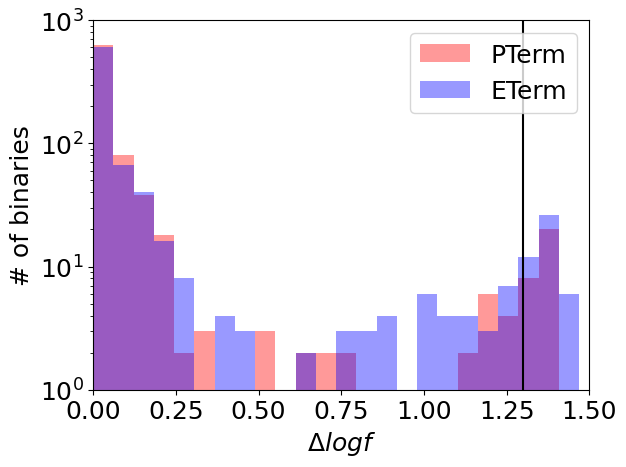

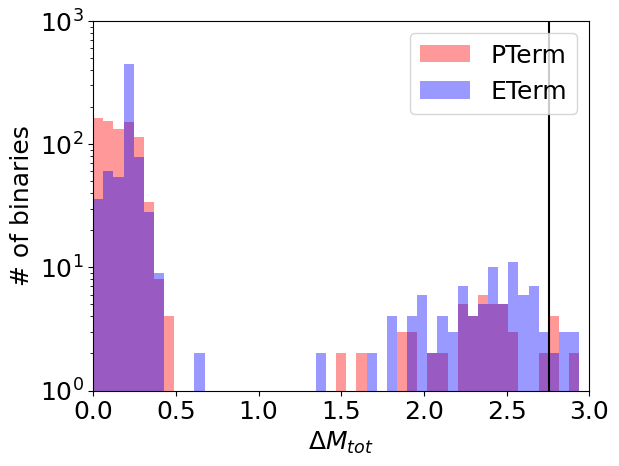

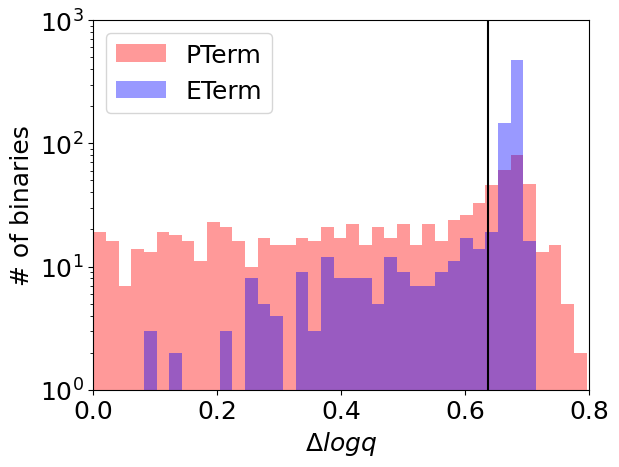

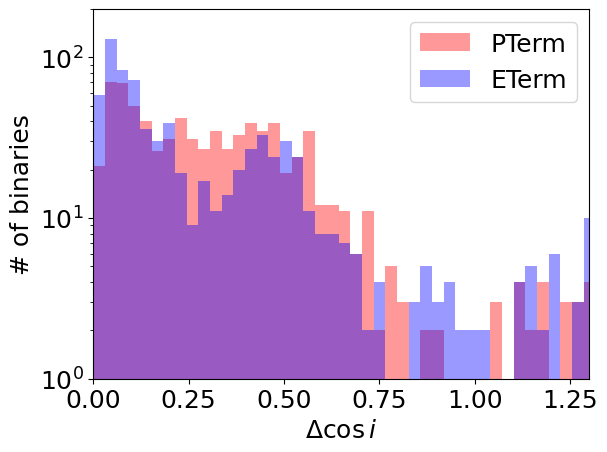

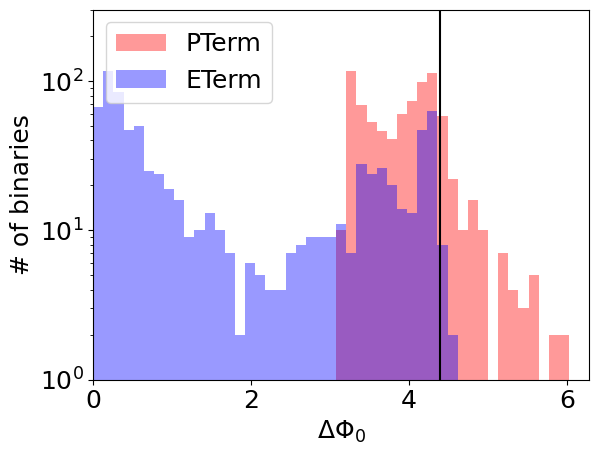

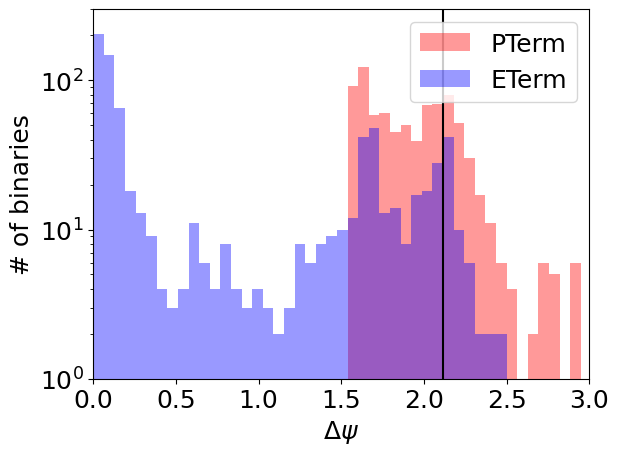

In [ ]:
#Logf

ETerm_Delta_logf=ETerm_logf_84-ETerm_logf_16
PTerm_Delta_logf=PTerm_logf_84-PTerm_logf_16

###Prior
N=1000
f_Prior=np.random.uniform(-7, -9, int(N))
f_Prior_16=np.percentile(f_Prior,16)
f_Prior_84=np.percentile(f_Prior,84)
Delta_logf_Prior=f_Prior_84-f_Prior_16

f_Vector=np.linspace(0,3,50)
plt.hist(PTerm_Delta_logf,f_Vector,alpha=0.4,color='r')
plt.hist(ETerm_Delta_logf,f_Vector,alpha=0.4,color='b')
plt.legend(['PTerm','ETerm'],fontsize=18)

plt.vlines(Delta_logf_Prior,0,10000,color='k')
plt.xlim(0,1.5)
plt.ylim(1,1000)
plt.xlabel(r'$\Delta logf$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)

plt.show()

################################################
#LogMtot
ETerm_Delta_logM=ETerm_logM_84-ETerm_logM_16
PTerm_Delta_logM=PTerm_logM_84-PTerm_logM_16

#Prior
N=1000
M_Prior=np.random.uniform(6, 10, int(N))
M_Prior_16=np.percentile(M_Prior,16)
M_Prior_84=np.percentile(M_Prior,84)
Delta_logM_Prior=M_Prior_84-M_Prior_16

M_Vector=np.linspace(0,3,50)

plt.hist(PTerm_Delta_logM,M_Vector,alpha=0.4,color='r')
plt.hist(ETerm_Delta_logM,M_Vector,alpha=0.4,color='b')
plt.legend(['PTerm','ETerm'],fontsize=18)

plt.vlines(Delta_logM_Prior,0,10000,color='k')
plt.xlim(0,3)
plt.ylim(1,1000)
plt.xlabel(r'$\Delta M_{tot}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)

plt.show()

################################################
#Logq
ETerm_Delta_logq=ETerm_logq_84-ETerm_logq_16
PTerm_Delta_logq=PTerm_logq_84-PTerm_logq_16

#Prior
N=1000
q_Prior=np.random.uniform(-1, 0, int(N))
q_Prior_16=np.percentile(q_Prior,16)
q_Prior_84=np.percentile(q_Prior,84)
Delta_logq_Prior=q_Prior_84-q_Prior_16

q_Vector=np.linspace(0,1,50)

plt.hist(PTerm_Delta_logq,q_Vector, alpha=0.4,color='r')
plt.hist(ETerm_Delta_logq,q_Vector,alpha=0.4,color='b')
plt.legend(['PTerm','ETerm'],fontsize=18)

plt.vlines(Delta_logq_Prior,0,10000,color='k')
plt.xlim(0,0.8)
plt.ylim(1,1000)
plt.xlabel(r'$\Delta logq$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)

plt.show()

################################################
#Cosi
ETerm_Delta_cosi=ETerm_cosi_84-ETerm_cosi_16
PTerm_Delta_cosi=PTerm_cosi_84-PTerm_cosi_16

###Prior
N=1000
cosi_Prior=np.random.uniform(-1, 1, int(N))
cosi_Prior_16=np.percentile(cosi_Prior,16)
cosi_Prior_84=np.percentile(cosi_Prior,84)
Delta_cosi_Prior=cosi_Prior_84-cosi_Prior_16

cosi_Vector=np.linspace(0,1.5,50)

plt.hist(PTerm_Delta_cosi,cosi_Vector, alpha=0.4,color='r')
plt.hist(ETerm_Delta_cosi,cosi_Vector, alpha=0.4,color='b')
plt.legend(['PTerm','ETerm'],fontsize=18)

plt.vlines(Delta_cosi_Prior,0,1000,color='k')
plt.xlim(0,1.3)
plt.ylim(1,200)
plt.xlabel(r'$\Delta \cos i$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)

plt.show()

################################################
#Initial GW phase
ETerm_Delta_phase=ETerm_phase_84-ETerm_phase_16
PTerm_Delta_phase=PTerm_phase_84-PTerm_phase_16

phase_Vector=np.linspace(0,2*np.pi,50)
N=1000
phase_Prior=np.random.uniform(0, 2*np.pi, int(N))
phase_Prior_16=np.percentile(phase_Prior,16)
phase_Prior_84=np.percentile(phase_Prior,84)
Dphase_Prior=phase_Prior_84-phase_Prior_16


plt.hist(PTerm_Delta_phase,phase_Vector, alpha=0.4,color='r')
plt.hist(ETerm_Delta_phase,phase_Vector, alpha=0.4,color='b')
plt.legend(['PTerm','ETerm'],fontsize=18)

plt.vlines(Dphase_Prior,0,1000,color='k')
plt.xlim(0,2*np.pi)
plt.ylim(1,300)
plt.xlabel(r'$\Delta \Phi_0$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)

plt.show()

################################################
#Polarization Angle
ETerm_Delta_psi=ETerm_psi_84-ETerm_psi_16
PTerm_Delta_psi=PTerm_psi_84-PTerm_psi_16

psi_Vector=np.linspace(0,np.pi,50)
N=1000
psi_Prior=np.random.uniform(0, np.pi, int(N))
psi_Prior_16=np.percentile(psi_Prior,16)
psi_Prior_84=np.percentile(psi_Prior,84)
Delta_psi_Prior=psi_Prior_84-psi_Prior_16


plt.hist(PTerm_Delta_psi, psi_Vector, alpha=0.4,color='r')
plt.hist(ETerm_Delta_psi, psi_Vector, alpha=0.4,color='b')
plt.legend(['PTerm','ETerm'],fontsize=18)

plt.vlines(Delta_psi_Prior,0,1000,color='k')
plt.xlim(0,3)
plt.ylim(1,300)
plt.xlabel(r'$\Delta \psi$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)

plt.show()

## Intervals Ratio

$R_{\Delta X}=\Delta X_{68} (\mathit{ETerm})/\Delta X_{68} (\mathit{PTerm})$

We compare the ratio of the $68\%$ credible intervals of both  analyses. We show the distributions of $R_{\Delta X}$ for each parameter $X$ and the percentiles of these distributions. The vertical black lines is the equality line $R_{\Delta X}=1$. See Results and Table 2 in the paper.

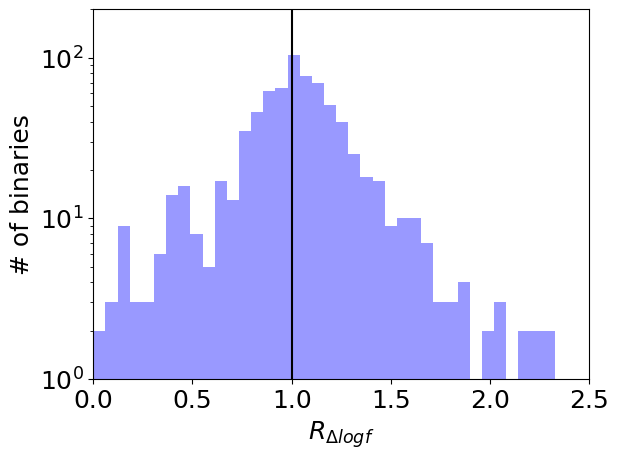

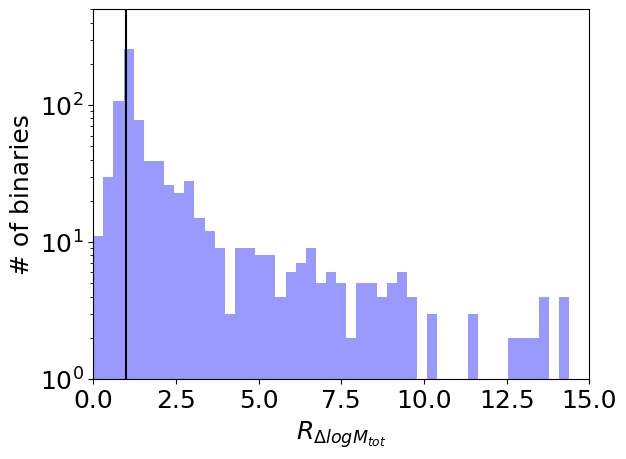

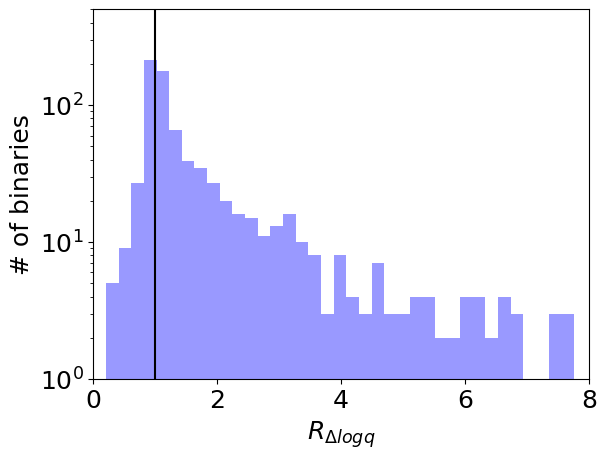

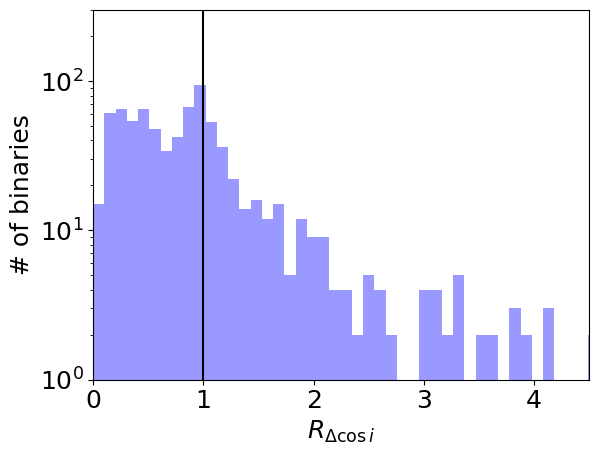

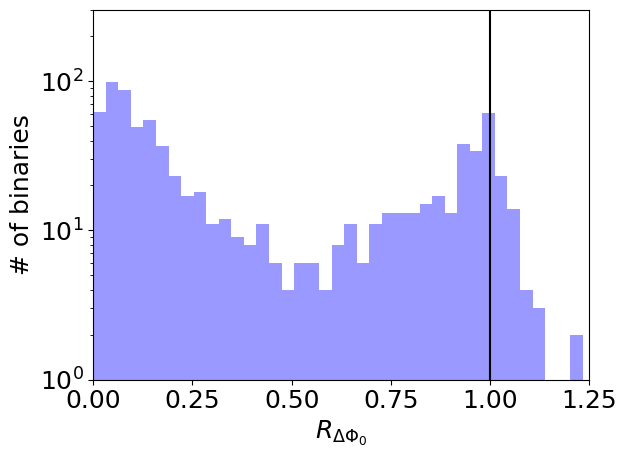

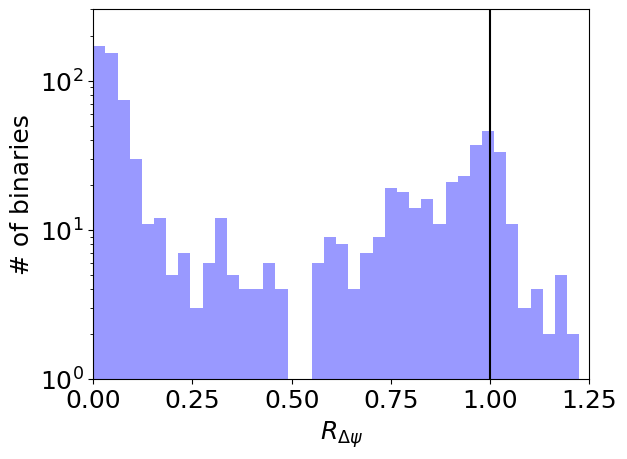

In [ ]:
#Logf
R_Delta_logf=ETerm_Delta_logf/PTerm_Delta_logf

r_vector=np.linspace(0,3,50)
plt.hist(R_Delta_logf,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,2.5)
plt.ylim(1,200)
plt.xlabel(r'$R_{\Delta log f}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

###################################################
#LogMtot
R_Delta_logM=ETerm_Delta_logM/PTerm_Delta_logM

r_vector=np.linspace(0,15,50)
plt.hist(R_Delta_logM,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,15)
plt.ylim(1,500)
plt.xlabel(r'$R_{\Delta log M_{tot}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

###################################################
#Logq
R_Delta_logq=ETerm_Delta_logq/PTerm_Delta_logq

r_vector=np.linspace(0,10,50)
plt.hist(R_Delta_logq,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,8)
plt.ylim(1,500)
plt.xlabel(r'$R_{\Delta log q}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

###################################################
#Cosi
R_Delta_cosi=ETerm_Delta_cosi/PTerm_Delta_cosi

r_vector=np.linspace(0,5,50)
plt.hist(R_Delta_cosi,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,4.5)
plt.ylim(1,300)
plt.xlabel(r'$R_{\Delta \cos i}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

###################################################
#Initial GW phase
R_Delta_phase=ETerm_Delta_phase/PTerm_Delta_phase

r_vector=np.linspace(0,1.55,50)
plt.hist(R_Delta_phase,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,1.25)
plt.ylim(1,300)
plt.xlabel(r'$R_{\Delta \Phi_0}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

###################################################
#Polarization Angle
R_Delta_psi=ETerm_Delta_psi/PTerm_Delta_psi

r_vector=np.linspace(0,1.5,50)
plt.hist(R_Delta_psi,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,1.25)
plt.ylim(1,300)
plt.xlabel(r'$R_{\Delta \psi}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

In [ ]:
#Logf
print('ETerm vs PTerm: R_Delta_logf (16th, 50th and 84th) percentiles:'
        ,np.percentile(R_Delta_logf,16),np.percentile(R_Delta_logf,50),np.percentile(R_Delta_logf,84))

#LogMtot
print('ETerm vs PTerm: R_Delta_logM (16th, 50th and 84th) percentiles:'
        ,np.percentile(R_Delta_logM,16),np.percentile(R_Delta_logM,50),np.percentile(R_Delta_logM,84))

#Logq
print('ETerm vs PTerm: R_Delta_logq (16th, 50th and 84th) percentiles:'
        ,np.percentile(R_Delta_logq,16),np.percentile(R_Delta_logq,50),np.percentile(R_Delta_logq,84))

#Cosi 
print('ETerm vs PTerm: R_Delta_cosi (16th, 50th and 84th) percentiles:'
        ,np.percentile(R_Delta_cosi,16),np.percentile(R_Delta_cosi,50),np.percentile(R_Delta_cosi,84))

#Initial GW phase
print('ETerm vs PTerm: R_Delta_Phi0 (16th, 50th and 84th) percentiles:'
        ,np.percentile(R_Delta_phase,16),np.percentile(R_Delta_phase,50),np.percentile(R_Delta_phase,84))

#GW polarization angle
print('ETerm vs PTerm: R_Delta_psi (16th, 50th and 84th) percentiles:'
        ,np.percentile(R_Delta_psi,16),np.percentile(R_Delta_psi,50),np.percentile(R_Delta_psi,84))

ETerm vs PTerm: R_Delta_logf (16th, 50th and 84th) percentiles: 0.7921818229942218 1.0435813173685766 1.406845959522995
ETerm vs PTerm: R_Delta_logM (16th, 50th and 84th) percentiles: 0.8957746114610876 1.2497547476698392 4.8116705421997725
ETerm vs PTerm: R_Delta_logq (16th, 50th and 84th) percentiles: 0.9711454860134867 1.1843649703797066 3.314838696205207
ETerm vs PTerm: R_Delta_cosi (16th, 50th and 84th) percentiles: 0.2897614446171946 0.8571106149835658 1.5958078629911945
ETerm vs PTerm: R_Delta_Phi0 (16th, 50th and 84th) percentiles: 0.05468014243281832 0.22316548997720503 0.9646476511134273
ETerm vs PTerm: R_Delta_psi (16th, 50th and 84th) percentiles: 0.026535621672947127 0.10316791288116303 0.9633485680025513


## KL Divergence

We calculate the Kullback–Leibler divergence $D_{KL}$, which measures the difference in information content between two distributions, a parameter's prior and posterior in our case. A high value of $D_{KL}$ shows more deviation of the posterior from the prior (and thus higher gain of information from the data), while a value of zero signifies identical distributions (i.e., the data did not update the prior information). We compare the distributions of $D_{KL}$ of both analyses for all binary parameters. See Results in the paper.

In [ ]:
ETerm_kl_logf=data['ETerm_kl_logf']
ETerm_kl_logM=data['ETerm_kl_logM']
ETerm_kl_logq=data['ETerm_kl_logq']
ETerm_kl_cosi=data['ETerm_kl_cosi']
ETerm_kl_phase=data['ETerm_kl_phase']
ETerm_kl_psi=data['ETerm_kl_psi']

#PTerm
PTerm_kl_logf=data['PTerm_kl_logf']
PTerm_kl_logM=data['PTerm_kl_logM']
PTerm_kl_logq=data['PTerm_kl_logq']
PTerm_kl_cosi=data['PTerm_kl_cosi']
PTerm_kl_phase=data['PTerm_kl_phase']
PTerm_kl_psi=data['PTerm_kl_psi']


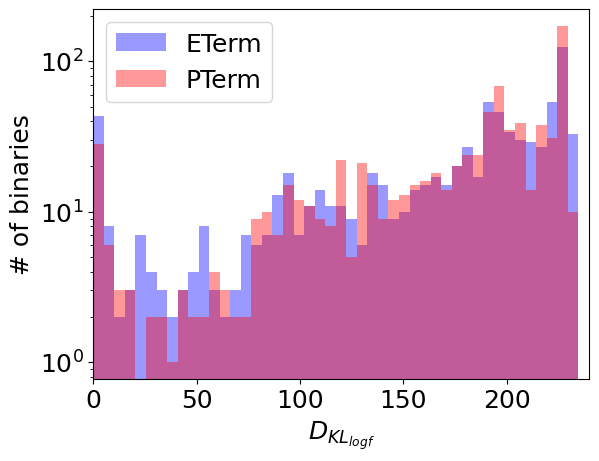

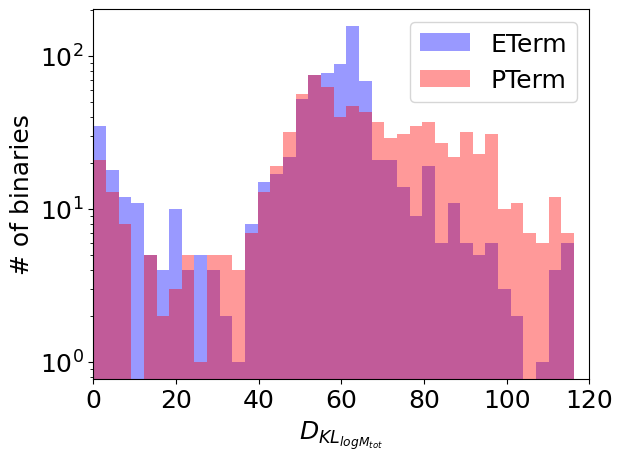

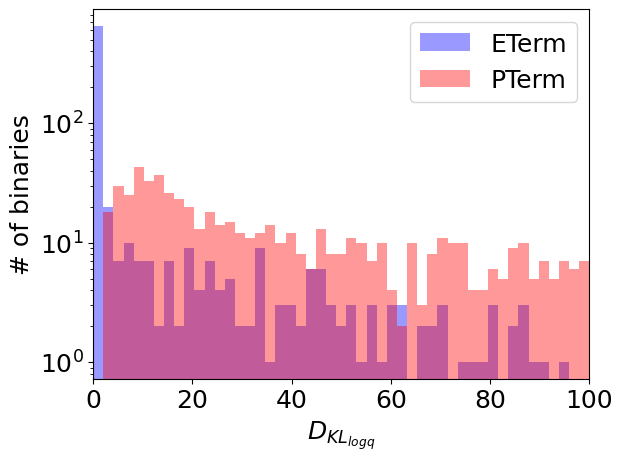

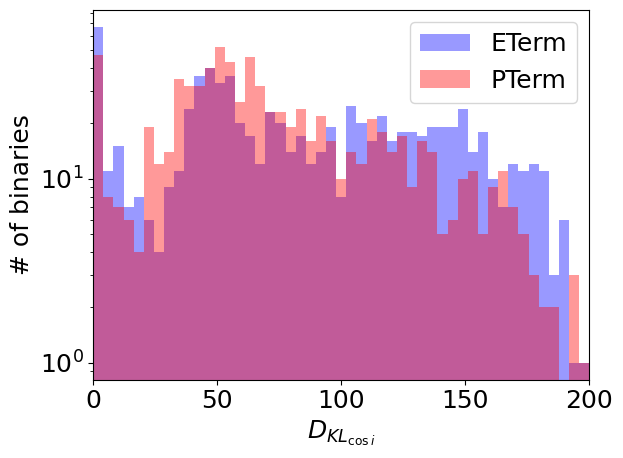

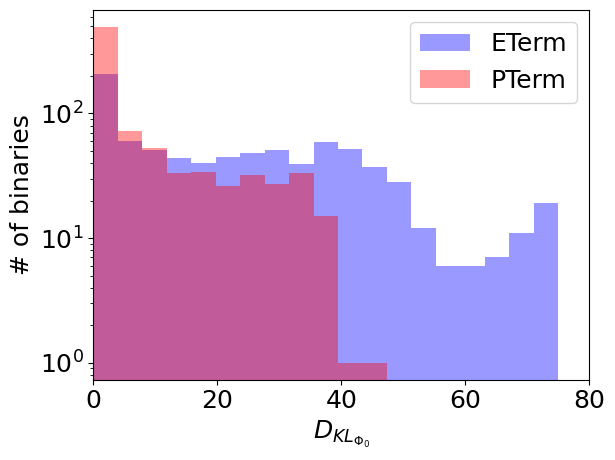

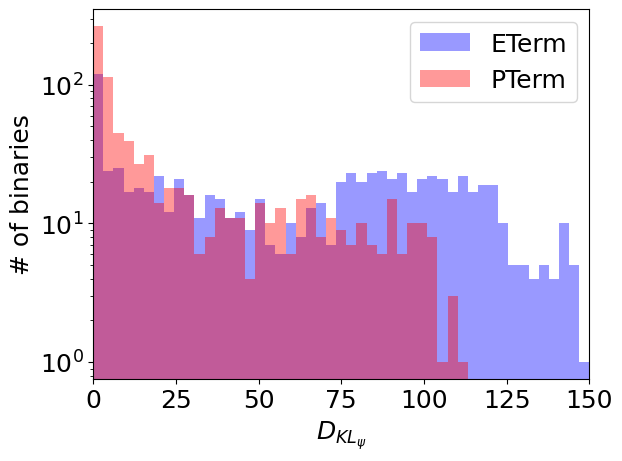

In [ ]:
#Logf
ff_vector=np.linspace(0,250,50)

plt.hist(ETerm_kl_logf,ff_vector,color='b',alpha=0.4)
plt.hist(PTerm_kl_logf,ff_vector,color='r',alpha=0.4)
plt.xlim(0,240)
plt.legend(['ETerm','PTerm'])
plt.xlabel(r'$D_{KL_{logf}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#######################################################
#LogMtot
MM_vector=np.linspace(0,150,50)

plt.hist(ETerm_kl_logM,MM_vector,color='b',alpha=0.4)
plt.hist(PTerm_kl_logM,MM_vector,color='r',alpha=0.4)
plt.xlim(0,120)
plt.legend(['ETerm','PTerm'])
plt.xlabel(r'$D_{KL_{logM_{tot}}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#######################################################
#Logq
qq_vector=np.linspace(0,100,50)

plt.hist(ETerm_kl_logq,qq_vector,color='b',alpha=0.4)
plt.hist(PTerm_kl_logq,qq_vector,color='r',alpha=0.4)
plt.xlim(0,100)
plt.legend(['ETerm','PTerm'])
plt.xlabel(r'$D_{KL_{logq}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#######################################################
#Cosi
cosi_vector=np.linspace(0,200,50)

plt.hist(ETerm_kl_cosi,cosi_vector,color='b',alpha=0.4)
plt.hist(PTerm_kl_cosi,cosi_vector,color='r',alpha=0.4)

plt.xlim(0,200)
plt.legend(['ETerm','PTerm'])
plt.xlabel(r'$D_{KL_{\cos i}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#######################################################
#Initial GW phase
phase_vector=np.linspace(0,75,20)

plt.hist(ETerm_kl_phase,phase_vector,color='b',alpha=0.4)
plt.hist(PTerm_kl_phase,phase_vector,color='r',alpha=0.4)

plt.xlim(0,80)
plt.legend(['ETerm','PTerm'])
plt.xlabel(r'$D_{KL_{\Phi_0}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#######################################################
#Polarization angle
psi_vector=np.linspace(0,150,50)

plt.hist(ETerm_kl_psi,psi_vector,color='b',alpha=0.4)
plt.hist(PTerm_kl_psi,psi_vector,color='r',alpha=0.4)

plt.xlim(0,150)
plt.legend(['ETerm','PTerm'])
plt.xlabel(r'$D_{KL_{\psi}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

## KL Divergence Ratio

 $R_{KL_X}=D_{KL_X} (\mathit{ETerm})/D_{KL_X} (\mathit{PTerm})$

We show the distributions of the ratio of $D_{KL}$ for both analysis and report the percentiles of these distributions. The vertical black lines show the equality lines $R_{KL}=1$. See Results and Table 2 in the paper.

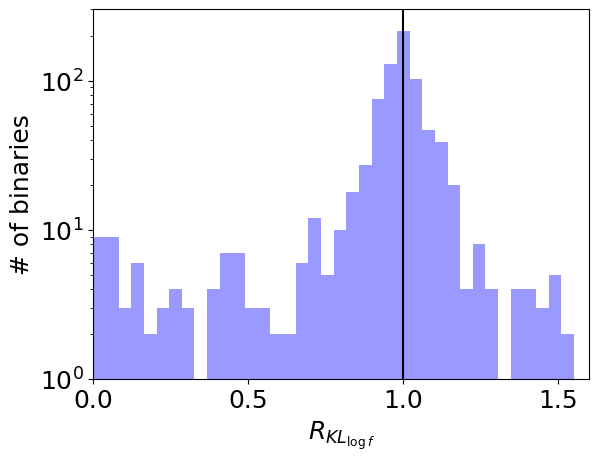

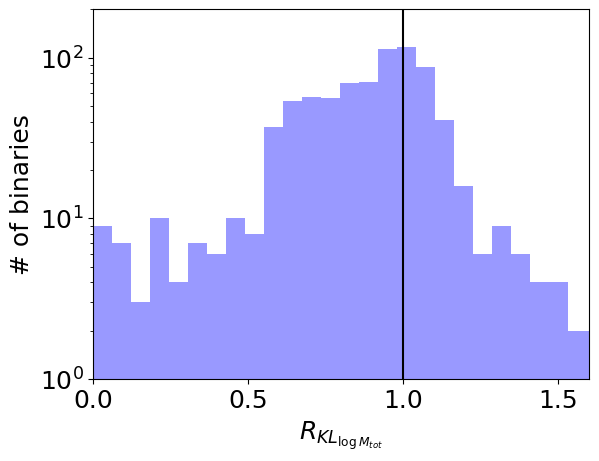

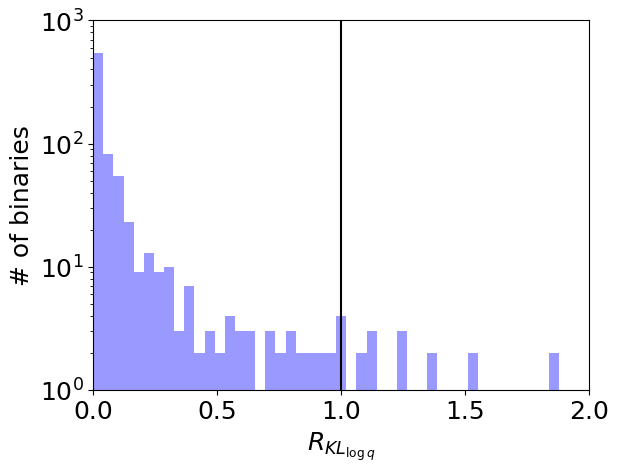

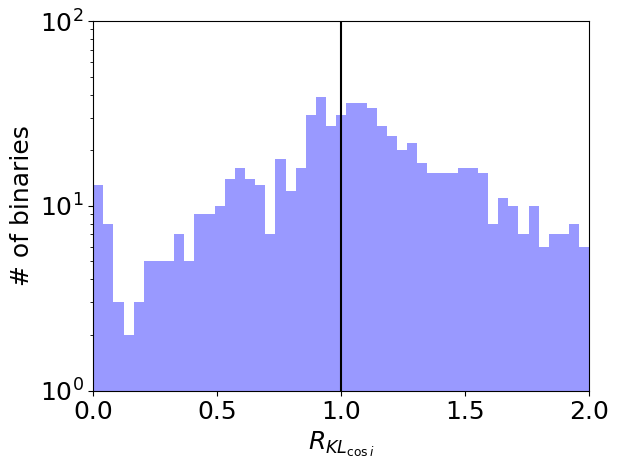

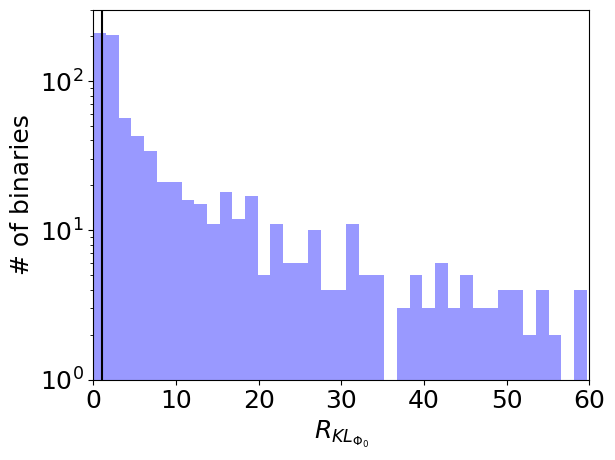

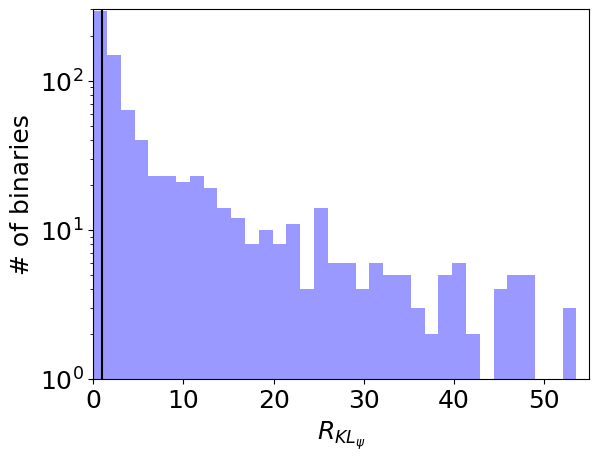

In [ ]:
#Logf
R_KL_logf=ETerm_kl_logf/PTerm_kl_logf

r_vector=np.linspace(0,2,50)
plt.hist(R_KL_logf,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,1.6)
plt.ylim(1,300)
plt.xlabel(r'$R_{KL_{\log f}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#############################################
#LogMtot
R_KL_logM=ETerm_kl_logM/PTerm_kl_logM

r_vector=np.linspace(0,3,50)
plt.hist(R_KL_logM,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,1.6)
plt.ylim(1,200)
plt.xlabel(r'$R_{KL_{\log M_{tot}}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#############################################
#Logq
R_KL_logq=ETerm_kl_logq/PTerm_kl_logq

r_vector=np.linspace(0,2,50)
plt.hist(R_KL_logq,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,2)
plt.ylim(1,1000)
plt.xlabel(r'$R_{KL_{\log q}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#############################################
#Cosi
R_KL_cosi=ETerm_kl_cosi/PTerm_kl_cosi

r_vector=np.linspace(0,2,50)
plt.hist(R_KL_cosi,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,2)
plt.ylim(1,100)
plt.xlabel(r'$R_{KL_{\cos i}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#############################################
#Initial GW phase
R_KL_phase=ETerm_kl_phase/PTerm_kl_phase

r_vector=np.linspace(0,75,50)
plt.hist(R_KL_phase,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,60)
plt.ylim(1,300)
plt.xlabel(r'$R_{KL_{\Phi_0}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

#############################################
#Polarization angle
R_KL_psi=ETerm_kl_psi/PTerm_kl_psi

r_vector=np.linspace(0,75,50)
plt.hist(R_KL_psi,r_vector,alpha=0.4,color='b')
plt.vlines(1,0,1000,color='k')
plt.xlim(0,55)
plt.ylim(1,300)
plt.xlabel(r'$R_{KL_{\psi}}$')
plt.yscale('log')
plt.ylabel('# of binaries', fontsize=18)
plt.show()

In [ ]:
#Logf
print('ETerm vs PTerm: R_KL_logf (16th, 50th and 84th percentiles):'
        ,np.percentile(R_KL_logf,16),np.percentile(R_KL_logf,50),np.percentile(R_KL_logf,84))

#LogMtot
print('ETerm vs PTerm: R_KL_logM (16th, 50th and 84th percentiles):'
        ,np.percentile(R_KL_logM,16),np.percentile(R_KL_logM,50),np.percentile(R_KL_logM,84))

#Logq
print('ETerm vs PTerm: R_KL_logq (16th, 50th and 84th percentiles):'
        ,np.percentile(R_KL_logq,16),np.percentile(R_KL_logq,50),np.percentile(R_KL_logq,84))

#Cosi
print('ETerm vs PTerm: R_KL_cosi (16th, 50th and 84th percentiles):'
        ,np.percentile(R_KL_cosi,16),np.percentile(R_KL_cosi,50),np.percentile(R_KL_cosi,84))

#Initial GW phase
print('ETerm vs PTerm: R_KL_Phi0 (16th, 50th and 84th percentiles):'
        ,np.percentile(R_KL_phase,16),np.percentile(R_KL_phase,50),np.percentile(R_KL_phase,84))

#Polarization angle
print('ETerm vs PTerm: R_KL_psi (16th, 50th and 84th percentiles):'
        ,np.percentile(R_KL_psi,16),np.percentile(R_KL_psi,50),np.percentile(R_KL_psi,84))

ETerm vs PTerm: R_KL_logf (16th, 50th and 84th percentiles): 0.8842165949416747 0.9930627319977219 1.0805778660224012
ETerm vs PTerm: R_KL_logM (16th, 50th and 84th percentiles): 0.6547850922954686 0.9200733526211309 1.0712510224277154
ETerm vs PTerm: R_KL_logq (16th, 50th and 84th percentiles): 0.004379113936043235 0.01928926011224765 0.1426738141537022
ETerm vs PTerm: R_KL_cosi (16th, 50th and 84th percentiles): 0.6657108234164191 1.1225588982308743 1.889179218191806
ETerm vs PTerm: R_KL_Phi0 (16th, 50th and 84th percentiles): 1.257830030779578 3.040810914692992 22.650455685160836
ETerm vs PTerm: R_KL_psi (16th, 50th and 84th percentiles): 0.9590347007613673 2.723673006767707 19.256810184951124


## p-p test

The p-p test quantifies potential biases in the analysis. We assess the fraction of our simulated binary datasets for which the injected value falls within a given $p\%$ credible interval, $P_p$, where unbiased coverage would return $P_p=p$. We show the p-p plots for both analysis, along with the equality line in black which would represent a completely unbiased estimation. See Results in the paper.

In [ ]:
ETerm_p_logf=data['ETerm_p_logf']
ETerm_p_logM=data['ETerm_p_logM']
ETerm_p_logq=data['ETerm_p_logq']
ETerm_p_cosi=data['ETerm_p_cosi']
ETerm_p_phase=data['ETerm_p_phase']
ETerm_p_psi=data['ETerm_p_psi']

#PTerm
PTerm_p_logf=data['PTerm_p_logf']
PTerm_p_logM=data['PTerm_p_logM']
PTerm_p_logq=data['PTerm_p_logq']
PTerm_p_cosi=data['PTerm_p_cosi']
PTerm_p_phase=data['PTerm_p_phase']
PTerm_p_psi=data['PTerm_p_psi']


In [ ]:
p_value_vec=np.linspace(0,100,21)

ETerm_Pp_logf=[]
ETerm_Pp_logM=[]
ETerm_Pp_logq=[]
ETerm_Pp_cosi=[]
ETerm_Pp_phase=[]
ETerm_Pp_psi=[]
for pvalue in p_value_vec:
    ETerm_Pp_logf.append(np.shape(np.where(ETerm_p_logf<=pvalue))[1]/N_binaries*100)
    ETerm_Pp_logM.append(np.shape(np.where(ETerm_p_logM<=pvalue))[1]/N_binaries*100)
    ETerm_Pp_logq.append(np.shape(np.where(ETerm_p_logq<=pvalue))[1]/N_binaries*100)
    ETerm_Pp_cosi.append(np.shape(np.where(ETerm_p_cosi<=pvalue))[1]/N_binaries*100)
    ETerm_Pp_phase.append(np.shape(np.where(ETerm_p_phase<=pvalue))[1]/N_binaries*100)
    ETerm_Pp_psi.append(np.shape(np.where(ETerm_p_psi<=pvalue))[1]/N_binaries*100)


In [ ]:
#PTerm
PTerm_Pp_logf=[]
PTerm_Pp_logM=[]
PTerm_Pp_logq=[]
PTerm_Pp_cosi=[]
PTerm_Pp_phase=[]
PTerm_Pp_psi=[]
for pvalue in p_value_vec:
    PTerm_Pp_logf.append(np.shape(np.where(PTerm_p_logf<=pvalue))[1]/N_binaries*100)
    PTerm_Pp_logM.append(np.shape(np.where(PTerm_p_logM<=pvalue))[1]/N_binaries*100)
    PTerm_Pp_logq.append(np.shape(np.where(PTerm_p_logq<=pvalue))[1]/N_binaries*100)
    PTerm_Pp_cosi.append(np.shape(np.where(PTerm_p_cosi<=pvalue))[1]/N_binaries*100)
    PTerm_Pp_phase.append(np.shape(np.where(PTerm_p_phase<=pvalue))[1]/N_binaries*100)
    PTerm_Pp_psi.append(np.shape(np.where(PTerm_p_psi<=pvalue))[1]/N_binaries*100)

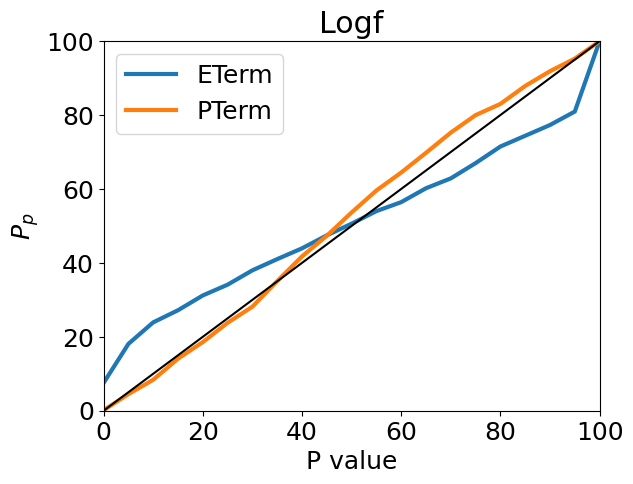

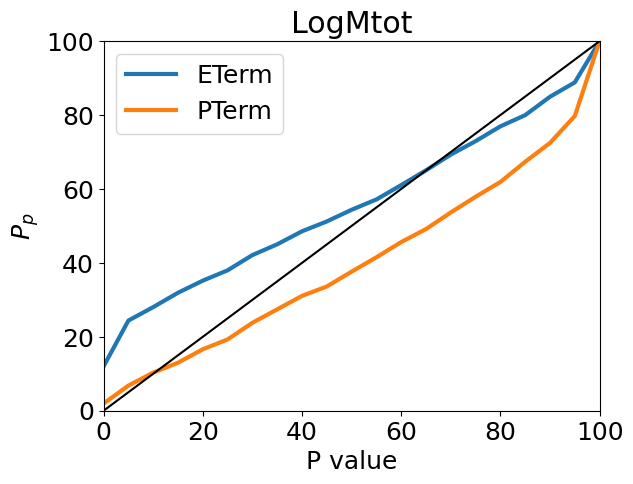

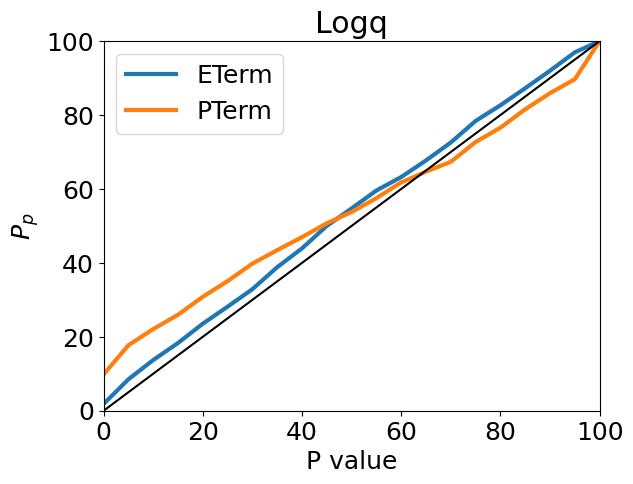

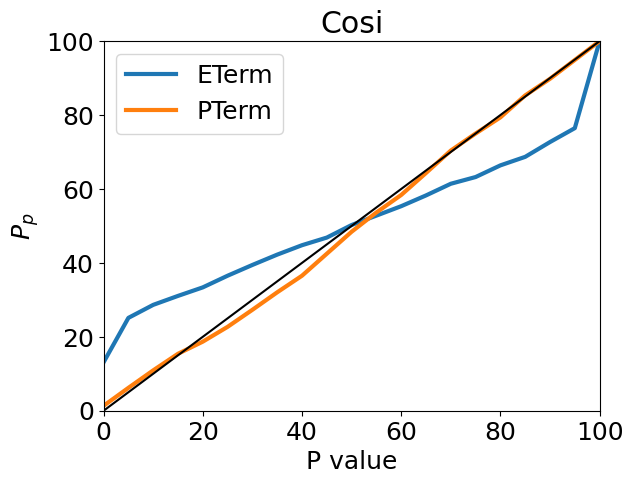

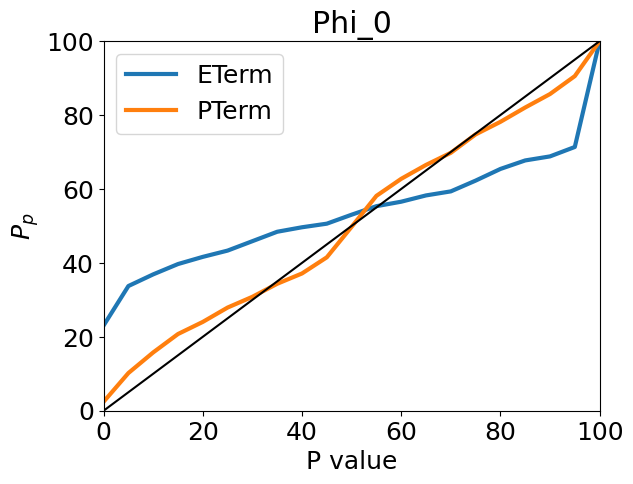

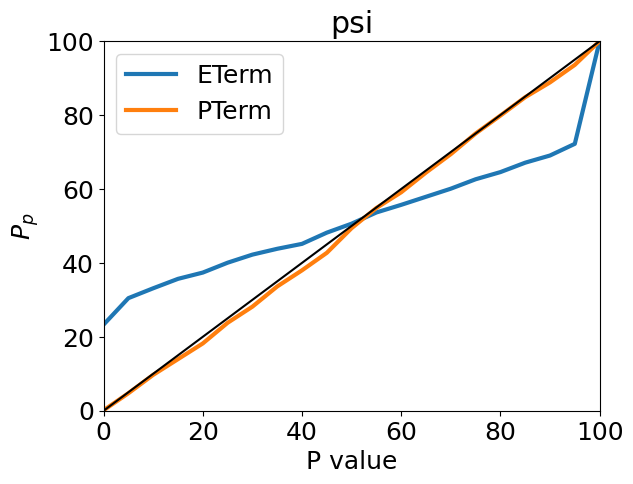

In [ ]:
#Logf
plt.plot(p_value_vec,ETerm_Pp_logf,linewidth=3)
plt.plot(p_value_vec,PTerm_Pp_logf,linewidth=3)
plt.plot(p_value_vec,p_value_vec,'k')
plt.legend(['ETerm','PTerm'])
plt.xlabel('P value')
plt.ylabel(r'$P_p$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Logf')
plt.show()

#################################################
#LogMtot
plt.plot(p_value_vec,ETerm_Pp_logM,linewidth=3)
plt.plot(p_value_vec,PTerm_Pp_logM,linewidth=3)
plt.plot(p_value_vec,p_value_vec,'k')
plt.legend(['ETerm','PTerm'])
plt.xlabel('P value')
plt.ylabel(r'$P_p$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('LogMtot')
plt.show()

#################################################
#Logq
plt.plot(p_value_vec,ETerm_Pp_logq,linewidth=3)
plt.plot(p_value_vec,PTerm_Pp_logq,linewidth=3)
plt.plot(p_value_vec,p_value_vec,'k')
plt.legend(['ETerm','PTerm'])
plt.xlabel('P value')
plt.ylabel(r'$P_p$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Logq')
plt.show()

#################################################
#Cosi
plt.plot(p_value_vec,ETerm_Pp_cosi,linewidth=3)
plt.plot(p_value_vec,PTerm_Pp_cosi,linewidth=3)
plt.plot(p_value_vec,p_value_vec,'k')
plt.legend(['ETerm','PTerm'])
plt.xlabel('P value')
plt.ylabel(r'$P_p$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Cosi')
plt.show()

#################################################
#Initial GW phase
plt.plot(p_value_vec,ETerm_Pp_phase,linewidth=3)
plt.plot(p_value_vec,PTerm_Pp_phase,linewidth=3)
plt.plot(p_value_vec,p_value_vec,'k')
plt.legend(['ETerm','PTerm'])
plt.xlabel('P value')
plt.ylabel(r'$P_p$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Phi_0')
plt.show()

#################################################
#Polarization angle
plt.plot(p_value_vec,ETerm_Pp_psi,linewidth=3)
plt.plot(p_value_vec,PTerm_Pp_psi,linewidth=3)
plt.plot(p_value_vec,p_value_vec,'k')
plt.legend(['ETerm','PTerm'])
plt.xlabel('P value')
plt.ylabel(r'$P_p$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('psi')

plt.show()

## P68 and P95

We report the $P_{68}$ and $P_{95}$ values for both analyses. See Results and Table 2 in the paper

In [ ]:
#Logf 
ETerm_pp_logf_68=np.shape(np.where(ETerm_p_logf<=68))[1]/N_binaries
ETerm_pp_logf_95=np.shape(np.where(ETerm_p_logf<=95))[1]/N_binaries
PTerm_pp_logf_68=np.shape(np.where(PTerm_p_logf<=68))[1]/N_binaries
PTerm_pp_logf_95=np.shape(np.where(PTerm_p_logf<=95))[1]/N_binaries


print('ETerm P68 and P95:',ETerm_pp_logf_68, ETerm_pp_logf_95)
print('PTerm P68 and P95:',PTerm_pp_logf_68, PTerm_pp_logf_95)


#LogMtot
ETerm_pp_logM_68=np.shape(np.where(ETerm_p_logM<=68))[1]/N_binaries
ETerm_pp_logM_95=np.shape(np.where(ETerm_p_logM<=95))[1]/N_binaries
PTerm_pp_logM_68=np.shape(np.where(PTerm_p_logM<=68))[1]/N_binaries
PTerm_pp_logM_95=np.shape(np.where(PTerm_p_logM<=95))[1]/N_binaries


print('ETerm P68 and P95:',ETerm_pp_logM_68, ETerm_pp_logM_95)
print('PTerm P68 and P95:',PTerm_pp_logM_68, PTerm_pp_logM_95)

#Logq
ETerm_pp_logq_68=np.shape(np.where(ETerm_p_logq<=68))[1]/N_binaries
ETerm_pp_logq_95=np.shape(np.where(ETerm_p_logq<=95))[1]/N_binaries
PTerm_pp_logq_68=np.shape(np.where(PTerm_p_logq<=68))[1]/N_binaries
PTerm_pp_logq_95=np.shape(np.where(PTerm_p_logq<=95))[1]/N_binaries


print('ETerm P68 and P95:',ETerm_pp_logq_68, ETerm_pp_logq_95)
print('PTerm P68 and P95:',PTerm_pp_logq_68, PTerm_pp_logq_95)

#Cosi
ETerm_pp_cosi_68=np.shape(np.where(ETerm_p_cosi<=68))[1]/N_binaries
ETerm_pp_cosi_95=np.shape(np.where(ETerm_p_cosi<=95))[1]/N_binaries
PTerm_pp_cosi_68=np.shape(np.where(PTerm_p_cosi<=68))[1]/N_binaries
PTerm_pp_cosi_95=np.shape(np.where(PTerm_p_cosi<=95))[1]/N_binaries


print('ETerm P68 and P95:',ETerm_pp_cosi_68, ETerm_pp_cosi_95)
print('PTerm P68 and P95:',PTerm_pp_cosi_68, PTerm_pp_cosi_95)

#Initial GW phase

ETerm_pp_psi_68=np.shape(np.where(ETerm_p_psi<=68))[1]/N_binaries
ETerm_pp_psi_95=np.shape(np.where(ETerm_p_psi<=95))[1]/N_binaries
PTerm_pp_psi_68=np.shape(np.where(PTerm_p_psi<=68))[1]/N_binaries
PTerm_pp_psi_95=np.shape(np.where(PTerm_p_psi<=95))[1]/N_binaries


print('ETerm P68 and P95:',ETerm_pp_psi_68, ETerm_pp_psi_95)
print('PTerm P68 and P95:',PTerm_pp_psi_68, PTerm_pp_psi_95)

ETerm P68 and P95: 0.6189320388349514 0.8094660194174758
PTerm P68 and P95: 0.7378640776699029 0.9526699029126213
ETerm P68 and P95: 0.6759708737864077 0.8883495145631068
PTerm P68 and P95: 0.5206310679611651 0.7973300970873787
ETerm P68 and P95: 0.7002427184466019 0.9696601941747572
PTerm P68 and P95: 0.6638349514563107 0.8968446601941747
ETerm P68 and P95: 0.6031553398058253 0.7645631067961165
PTerm P68 and P95: 0.6820388349514563 0.9490291262135923
ETerm P68 and P95: 0.595873786407767 0.7220873786407767
PTerm P68 and P95: 0.6711165048543689 0.9356796116504854


### Autocorrelation Length

The auto-correlation length $L_{X}$ for each parameter $X$, quantifies how often independent samples are drawn in the MCMC chains. Note that we thinned the chains by a factor of 10 and $L_{X}$ is calculated in the final chains. We compare the distributios of $L_{X}$ for both analyses. See Results and Figure 2 in the paper.

In [ ]:
ETerm_L_cosi=data['ETerm_auto_len_cosi']
ETerm_L_logM=data['ETerm_auto_len_logM']
ETerm_L_logf=data['ETerm_auto_len_logf']
ETerm_L_logq=data['ETerm_auto_len_logq']
ETerm_L_phase=data['ETerm_auto_len_phase']
ETerm_L_psi=data['ETerm_auto_len_psi']

PTerm_L_cosi=data['PTerm_auto_len_cosi']
PTerm_L_logM=data['PTerm_auto_len_logM']
PTerm_L_logf=data['PTerm_auto_len_logf']
PTerm_L_logq=data['PTerm_auto_len_logq']
PTerm_L_phase=data['PTerm_auto_len_phase']
PTerm_L_psi=data['PTerm_auto_len_psi']


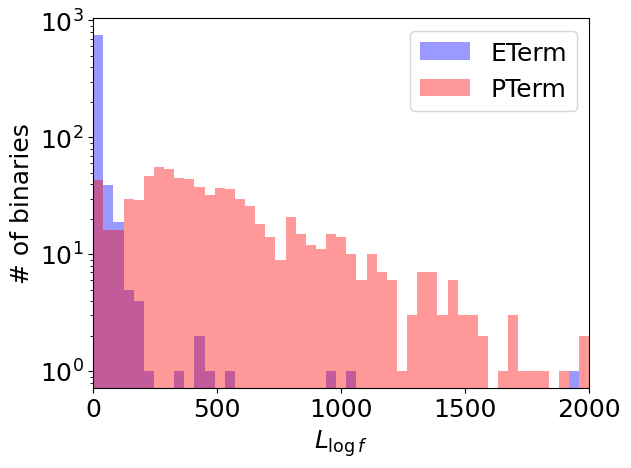

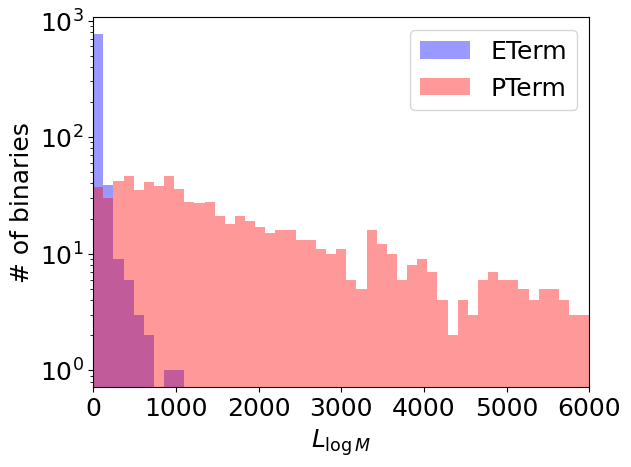

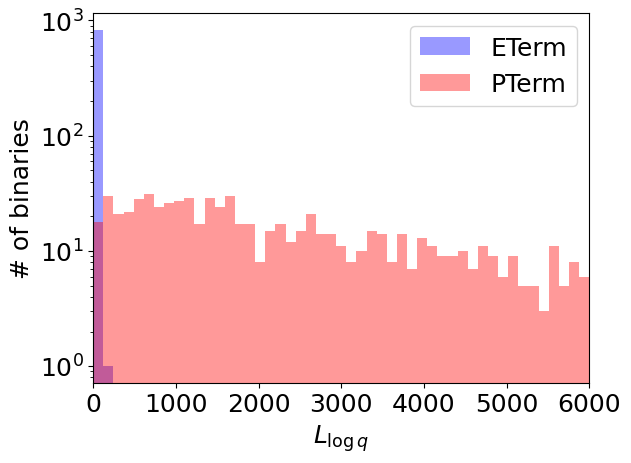

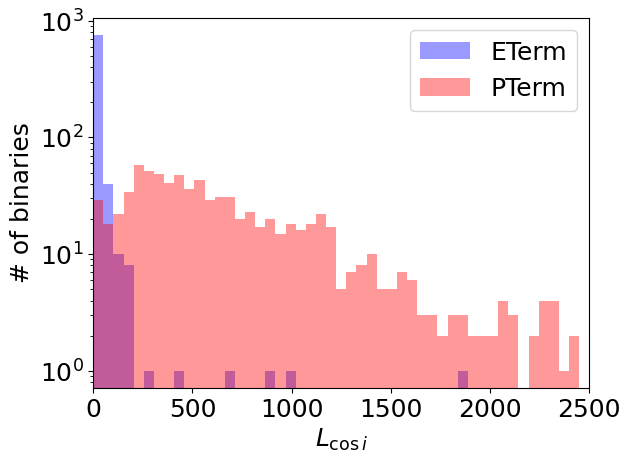

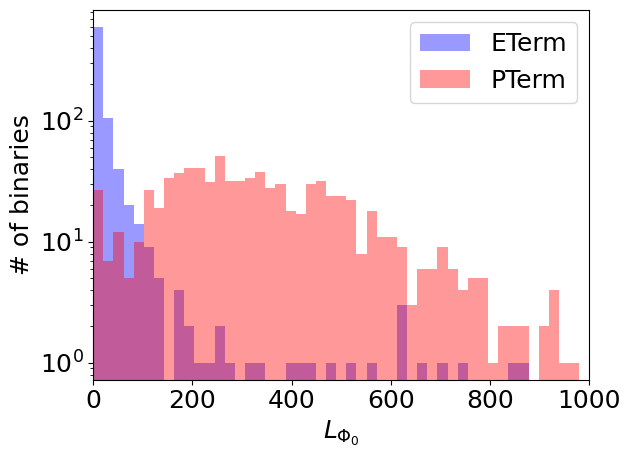

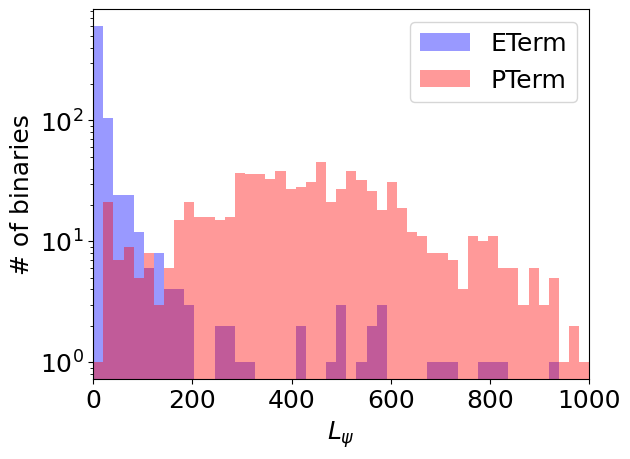

In [ ]:
#Logf
logf_vector=np.linspace(0,2000,50)

plt.hist(ETerm_L_logf,logf_vector,color='b',alpha=0.4)
plt.hist(PTerm_L_logf,logf_vector,color='r',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$L_{\log f}$')
plt.xlim(0,2000)

plt.legend(['ETerm','PTerm'])
plt.show()

#######################################################
#LogMtot
logM_vector=np.linspace(0,6000,50)

plt.hist(ETerm_L_logM,logM_vector,color='b',alpha=0.4)

plt.hist(PTerm_L_logM,logM_vector,color='r',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$L_{\log M}$')
plt.xlim(0,6000)
plt.legend(['ETerm','PTerm'])
plt.show()

#######################################################
#Logq
logq_vector=np.linspace(0,6000,50)

plt.hist(ETerm_L_logq,logq_vector,color='b',alpha=0.4)

plt.hist(PTerm_L_logq,logq_vector,color='r',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$L_{\log q}$')
plt.xlim(0,6000)
plt.legend(['ETerm',
            'PTerm'])
plt.show()

#######################################################
#Cosi
cosi_vector=np.linspace(0,2500,50)

plt.hist(ETerm_L_cosi,cosi_vector,color='b',alpha=0.4)

plt.hist(PTerm_L_cosi,cosi_vector,color='r',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$L_{\cos i}$')
plt.xlim(0,2500)
plt.legend(['ETerm',
            'PTerm'])
plt.show()

#######################################################
#Initial GW Phase
phase_vector=np.linspace(0,1000,50)


plt.hist(ETerm_L_phase,phase_vector,color='b',alpha=0.4)

plt.hist(PTerm_L_phase,phase_vector,color='r',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$L_{\Phi_0}$')
plt.xlim(0,1000)
plt.legend(['ETerm',
            'PTerm'])
plt.show()

#######################################################
#Polarization angle
psi_vector=np.linspace(0,1000,50)


plt.hist(ETerm_L_psi,psi_vector,color='b',alpha=0.4)

plt.hist(PTerm_L_psi,psi_vector,color='r',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$L_{\psi}$')
plt.xlim(0,1000)
plt.legend(['ETerm',
            'PTerm'])
plt.show()

In [ ]:
#Logf
print('ETerm: L_logf (16th, 50th and 84th percentiles)', np.percentile(ETerm_L_logf,16),np.percentile(ETerm_L_logf,50), np.percentile(ETerm_L_logf,84))
print('PTerm: L_logf (16th, 50th and 84th percentiles)', np.percentile(PTerm_L_logf,16),np.percentile(PTerm_L_logf,50), np.percentile(PTerm_L_logf,84))

#LogMtot
print('ETerm: L_logM (16th, 50th and 84th percentiles)', np.percentile(ETerm_L_logM,16),np.percentile(ETerm_L_logM,50), np.percentile(ETerm_L_logM,84))
print('PTerm: L_logM (16th, 50th and 84th percentiles)', np.percentile(PTerm_L_logM,16),np.percentile(PTerm_L_logM,50), np.percentile(PTerm_L_logM,84))

#Logq
print('ETerm: L_logq (16th, 50th and 84th percentiles)', np.percentile(ETerm_L_logq,16),np.percentile(ETerm_L_logq,50), np.percentile(ETerm_L_logq,84))
print('PTerm: L_logq (16th, 50th and 84th percentiles)', np.percentile(PTerm_L_logq,16),np.percentile(PTerm_L_logq,50), np.percentile(PTerm_L_logq,84))

#Cosi
print('ETerm: L_cosi (16th, 50th and 84th percentiles)', np.percentile(ETerm_L_cosi,16),np.percentile(ETerm_L_cosi,50), np.percentile(ETerm_L_cosi,84))
print('PTerm: L_cosi (16th, 50th and 84th percentiles)', np.percentile(PTerm_L_cosi,16),np.percentile(PTerm_L_cosi,50), np.percentile(PTerm_L_cosi,84))

#Initial GW phase
print('ETerm: L_Phi0 (16th, 50th and 84th percentiles)', np.percentile(ETerm_L_phase,16),np.percentile(ETerm_L_phase,50), np.percentile(ETerm_L_phase,84))
print('PTerm: L_Phi0 (16th, 50th and 84th percentiles)', np.percentile(PTerm_L_phase,16),np.percentile(PTerm_L_phase,50), np.percentile(PTerm_L_phase,84))

#GW polarization angle
print('ETerm: L_psi (16th, 50th and 84th percentiles)', np.percentile(ETerm_L_psi,16),np.percentile(ETerm_L_psi,50), np.percentile(ETerm_L_psi,84))
print('PTerm: L_psi (16th, 50th and 84th percentiles)', np.percentile(PTerm_L_psi,16),np.percentile(PTerm_L_psi,50), np.percentile(PTerm_L_psi,84))

ETerm: L_logf (16th, 50th and 84th percentiles) 6.744462519121108 10.32166052873642 20.94240828819459
PTerm: L_logf (16th, 50th and 84th percentiles) 202.50075054777582 438.11730796913594 978.4491298344611
ETerm: L_logM (16th, 50th and 84th percentiles) 7.989648102266237 14.520957448564452 37.17467017071615
PTerm: L_logM (16th, 50th and 84th percentiles) 434.9009149391911 1364.8683498860833 3800.6990673380474
ETerm: L_logq (16th, 50th and 84th percentiles) 7.368924379351871 12.869039330272951 26.29387036295179
PTerm: L_logq (16th, 50th and 84th percentiles) 660.202951721595 2197.9392715380127 5259.11635133458
ETerm: L_cosi (16th, 50th and 84th percentiles) 7.006807519062344 11.648009600781503 29.637909916901723
PTerm: L_cosi (16th, 50th and 84th percentiles) 237.0427599365436 538.2661463369785 1177.6739707517531
ETerm: L_Phi0 (16th, 50th and 84th percentiles) 7.020806248859436 12.200298191446487 34.684364540136265
PTerm: L_Phi0 (16th, 50th and 84th percentiles) 159.88335049457993 309.4

## Autocorrelation Length Ratio

$R_L=L_X(PTerm)/L_X(ETerm)$

We report the distributions and percentiles of the ratio $R_L$ of the autocorrelation lengths between the two analyses.

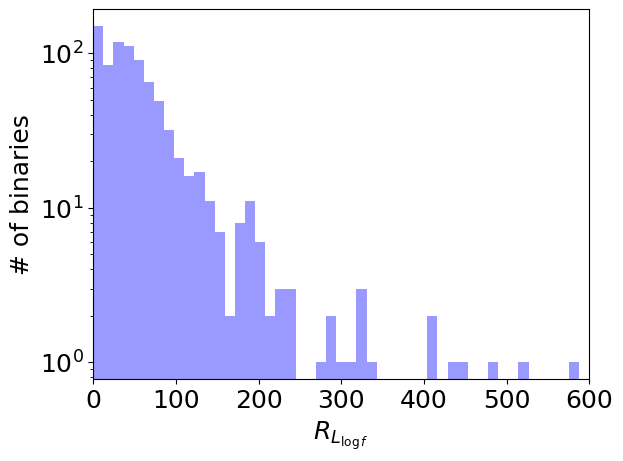

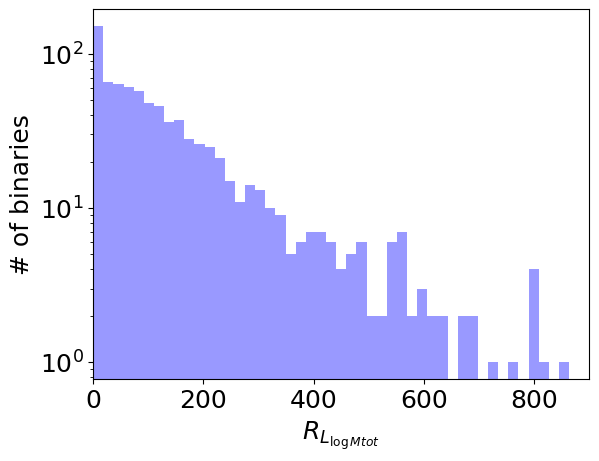

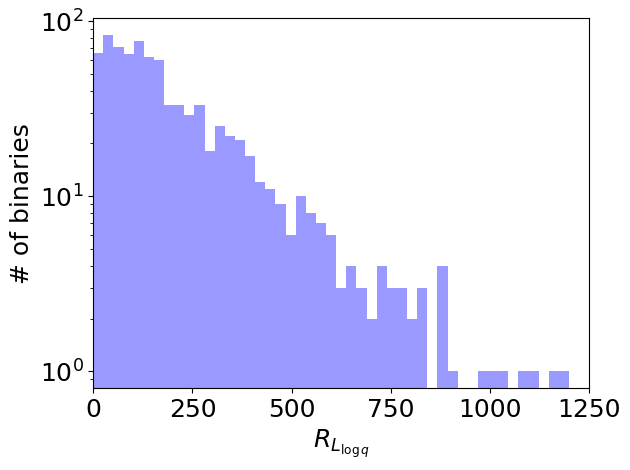

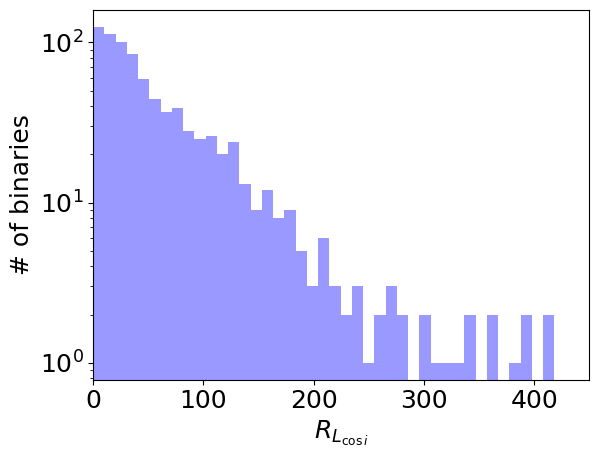

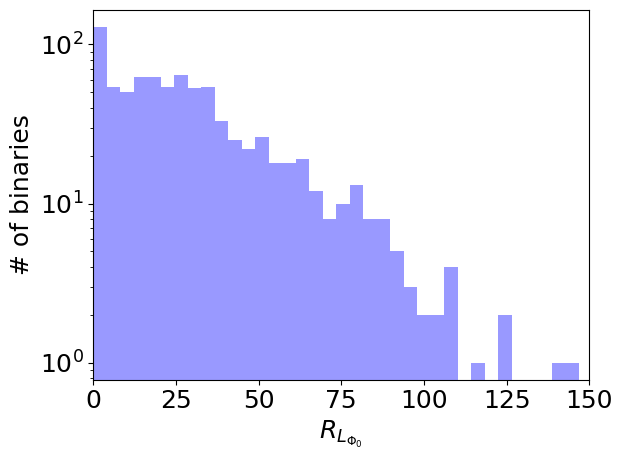

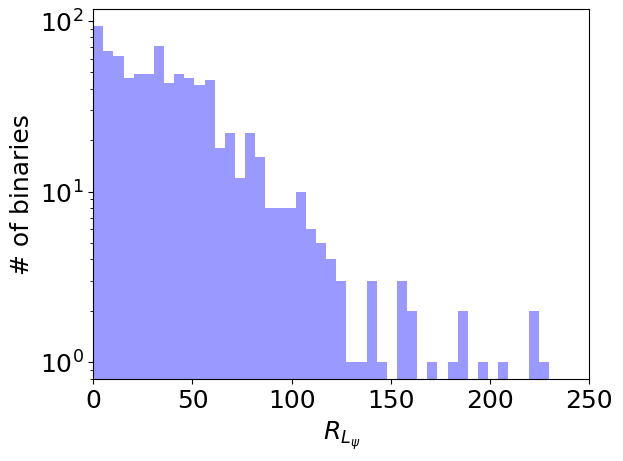

In [ ]:
#Logf
R_L_logf=PTerm_L_logf/ETerm_L_logf
r_vector=np.linspace(0,600,50)

plt.hist(R_L_logf,r_vector,color='b',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$R_{L_{\log f}}$')
plt.xlim(0,600)
plt.show()

##################################################
#LogMtot
R_L_logM=PTerm_L_logM/ETerm_L_logM
r_vector=np.linspace(0,900,50)

plt.hist(R_L_logM,r_vector, color='b',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$R_{L_{\log Mtot}}$')
plt.xlim(0,900)
plt.show()

##################################################
#Logq
R_L_logq=PTerm_L_logq/ETerm_L_logq
r_vector=np.linspace(0,1250,50)

plt.hist(R_L_logq, r_vector, color='b',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$R_{L_{\log q}}$')
plt.xlim(0,1250)
plt.show()

##################################################
#Cosi
R_L_cosi=PTerm_L_cosi/ETerm_L_cosi
r_vector=np.linspace(0,500,50)

plt.hist(R_L_cosi,r_vector,color='b',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$R_{L_{\cos i}}$')
plt.xlim(0,450)
plt.show()

##################################################
#Initial GW phase
R_L_phase=PTerm_L_phase/ETerm_L_phase
r_vector=np.linspace(0,200,50)

plt.hist(R_L_phase,r_vector,color='b',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$R_{L_{\Phi_0}}$')
plt.xlim(0,150)
plt.show()

##################################################
#polarization angle
R_L_psi=PTerm_L_psi/ETerm_L_psi
r_vector=np.linspace(0,250,50)

plt.hist(R_L_psi,r_vector,color='b',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$R_{L_{\psi}}$')
plt.xlim(0,250)
plt.show()

In [ ]:
#Logf
print('ETerm vs PTerm: R_L_logf, 16th, 50th and 84th percentiles:'
        ,np.percentile(R_L_logf,16),np.percentile(R_L_logf,50),np.percentile(R_L_logf,84))

#LogMtot
print('ETerm vs PTerm: R_L_logM, 16th, 50th and 84th percentiles:'
        ,np.percentile(R_L_logM,16),np.percentile(R_L_logM,50),np.percentile(R_L_logM,84))

#Logq
print('ETerm vs PTerm: R_L_logq, 16th, 50th and 84th percentiles:'
        ,np.percentile(R_L_logq,16),np.percentile(R_L_logq,50),np.percentile(R_L_logq,84))

#Cosi
print('ETerm vs PTerm: R_L_cosi, 16th, 50th and 84th percentiles:'
        ,np.percentile(R_L_cosi,16),np.percentile(R_L_cosi,50),np.percentile(R_L_cosi,84))

#Initial GW phase
print('ETerm vs PTerm: R_L_Phi0, 16th, 50th and 84th percentiles:'
        ,np.percentile(R_L_phase,16),np.percentile(R_L_phase,50),np.percentile(R_L_phase,84))

#Polarization angle
print('ETerm vs PTerm: R_L_psi, 16th, 50th and 84th percentiles:'
        ,np.percentile(R_L_psi,16),np.percentile(R_L_psi,50),np.percentile(R_L_psi,84))

ETerm vs PTerm: R_L_logf, 16th, 50th and 84th percentiles: 8.500140355923989 42.96434571147524 92.49315792076749
ETerm vs PTerm: R_L_logM, 16th, 50th and 84th percentiles: 13.721048723579203 94.5407677041238 275.04838861294303
ETerm vs PTerm: R_L_logq, 16th, 50th and 84th percentiles: 43.91140400005695 150.2911423116581 376.73209205841886
ETerm vs PTerm: R_L_cosi, 16th, 50th and 84th percentiles: 10.899496472635146 39.624354881237984 118.18229252143149
ETerm vs PTerm: R_L_Phi0, 16th, 50th and 84th percentiles: 4.328838154726812 24.515371879532008 53.978089541915686
ETerm vs PTerm: R_L_psi, 16th, 50th and 84th percentiles: 7.699881262412764 33.70776283984498 69.55659366189046


## Ratio of Maximum Correlation Length

$R_{L^{\rm max}}=L^{\rm max}(PTerm)/L^{\rm max}(ETerm)$

In order to ensure overall convergence in the analysis, every parameter needs to have enough independent samples, and thus the total length of the MCMC chain is determined by the chain with the longest $L_X$. In order to compare the efficiency of the two analyses, we calculate the maximum $L_X$ among the 6 binary parameter chains, $L^{\rm max}$, and then calculate the ratio of the maxima for the two analyses. We show the dirstribution and prercentiles of $L^{\rm max}$.

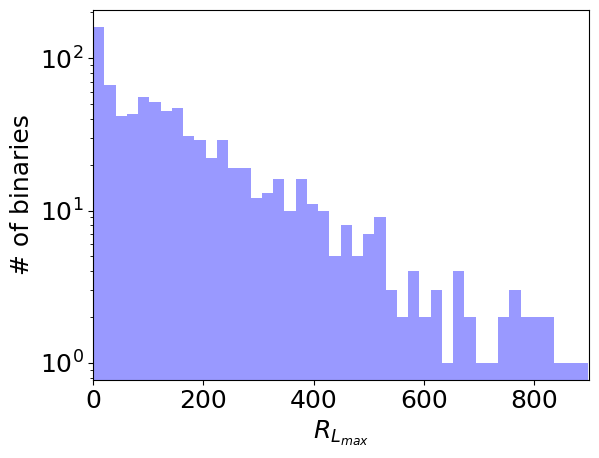

In [ ]:
ETerm_L_max=np.max([ETerm_L_cosi, ETerm_L_logM,ETerm_L_logf,ETerm_L_logq, ETerm_L_phase, ETerm_L_psi],0)
PTerm_L_max=np.max([PTerm_L_cosi, PTerm_L_logM,PTerm_L_logf,PTerm_L_logq, PTerm_L_phase, PTerm_L_psi],0)


R_Lmax=PTerm_L_max/ETerm_L_max
r_vector=np.linspace(0,1000,50)

plt.hist(R_Lmax,r_vector,color='b',alpha=0.4)
plt.yscale('log')
plt.ylabel('# of binaries')
plt.xlabel(r'$R_{L_{max}}$')
plt.xlim(0,900)
plt.show()



In [ ]:
print('ETerm vs PTerm: R_Lmax, 16th, 50th and 84th percentiles:'
        ,np.percentile(R_Lmax,16),np.percentile(R_Lmax,50),np.percentile(R_Lmax,84))

ETerm vs PTerm: R_Lmax, 16th, 50th and 84th percentiles: 13.980724661245208 119.14356719067071 330.45338643665576
